# How does the fringe transmission change on the sides of the PSF peak?
We perform here the same analysis as in Notebook 5, but for all point source observations throughout the different MIRI ground test campaigns.

## > Import modules

In [1]:
import funcs
import mrsobs

import numpy as np
import scipy.interpolate as scp_interpolate
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D
plt.style.use('presentation')
%matplotlib notebook

import warnings
warnings.simplefilter('ignore')

## > Get data
We load the images for one band of the MRS for different point source positions, from different ground tests, including: 
* FM MRS-OPT-01    (MRS FOV and Distortion Measurements)
* FM MRS-OPT-02    (MRS Image Quality)
* FM MRS-OPT-06    (Across Slit Scans)
* CV1RR MRS-OPT-02 (MRS Image Quality)
* CV2 MRS-OPT-02   (MRS Image Quality)
* CV3 MRS-OPT-02   (MRS Image Quality)

In [2]:
# Define paths to data
workDir   = '/Users/ioannisa/Desktop/python/miri_devel/'
cdpDir    = workDir+'cdp_data/'
d2cMapDir = workDir+'distortionMaps/'
lvl2path  = workDir+'FM_data/LVL2/'

# Get data
band = '2A'
FM_MRS_OPT_01_raster_centroid       = funcs.load_obj('FM_MRS_OPT_01_raster_centroid',path='obj/')
FM_MRS_OPT_02_centroid              = funcs.load_obj('FM_MRS_OPT_02_centroid',path='obj/')
FM_MRS_OPT_06_leftraster_centroid   = funcs.load_obj('FM_MRS_OPT_06_leftraster_centroid',path='obj/')
FM_MRS_OPT_06_middleraster_centroid = funcs.load_obj('FM_MRS_OPT_06_middleraster_centroid',path='obj/')
FM_MRS_OPT_06_rightraster_centroid  = funcs.load_obj('FM_MRS_OPT_06_rightraster_centroid',path='obj/')
CV1RR_MRS_OPT_02_centroid           = funcs.load_obj('CV1RR_MRS_OPT_02_centroid',path='obj/')
CV2_MRS_OPT_02_centroid             = funcs.load_obj('CV2_MRS_OPT_02_centroid',path='obj/')
CV3_MRS_OPT_02_centroid             = funcs.load_obj('CV3_MRS_OPT_02_centroid',path='obj/')
ext_source_sci,ext_source_bkg       = mrsobs.FM_MTS_BB_extended_source(lvl2path,band,bb_temp='800K')
ext_etal_source_sci,ext_etal_source_bkg     = mrsobs.FM_MTS_800K_BB_extended_source_through_etalon(lvl2path,band,etalon='ET1A')

# Get wavelength calibration pixel map
d2cMaps   = funcs.load_obj('d2cMaps_band{}'.format(band),path=d2cMapDir)
lambdaMap = d2cMaps['lambdaMap']
alphaMap = d2cMaps['alphaMap']
nslices   = d2cMaps['nslices']

# Get spectral resolution table
specres_table = funcs.get_cdps(cdpDir=cdpDir,band=band)[4]

In [3]:
# calibrate extended source observation
ext_source_bkgsubtr    = ext_source_sci-ext_source_bkg
ext_source_oddevencorr = funcs.OddEvenRowSignalCorrection(ext_source_bkgsubtr)

# calibrate extended source etalon observation
ext_etal_source_bkgsubtr   = ext_etal_source_sci-ext_etal_source_bkg
ext_etal_source_oddevencorr = funcs.OddEvenRowSignalCorrection(ext_etal_source_bkgsubtr)

<IPython.core.display.Javascript object>


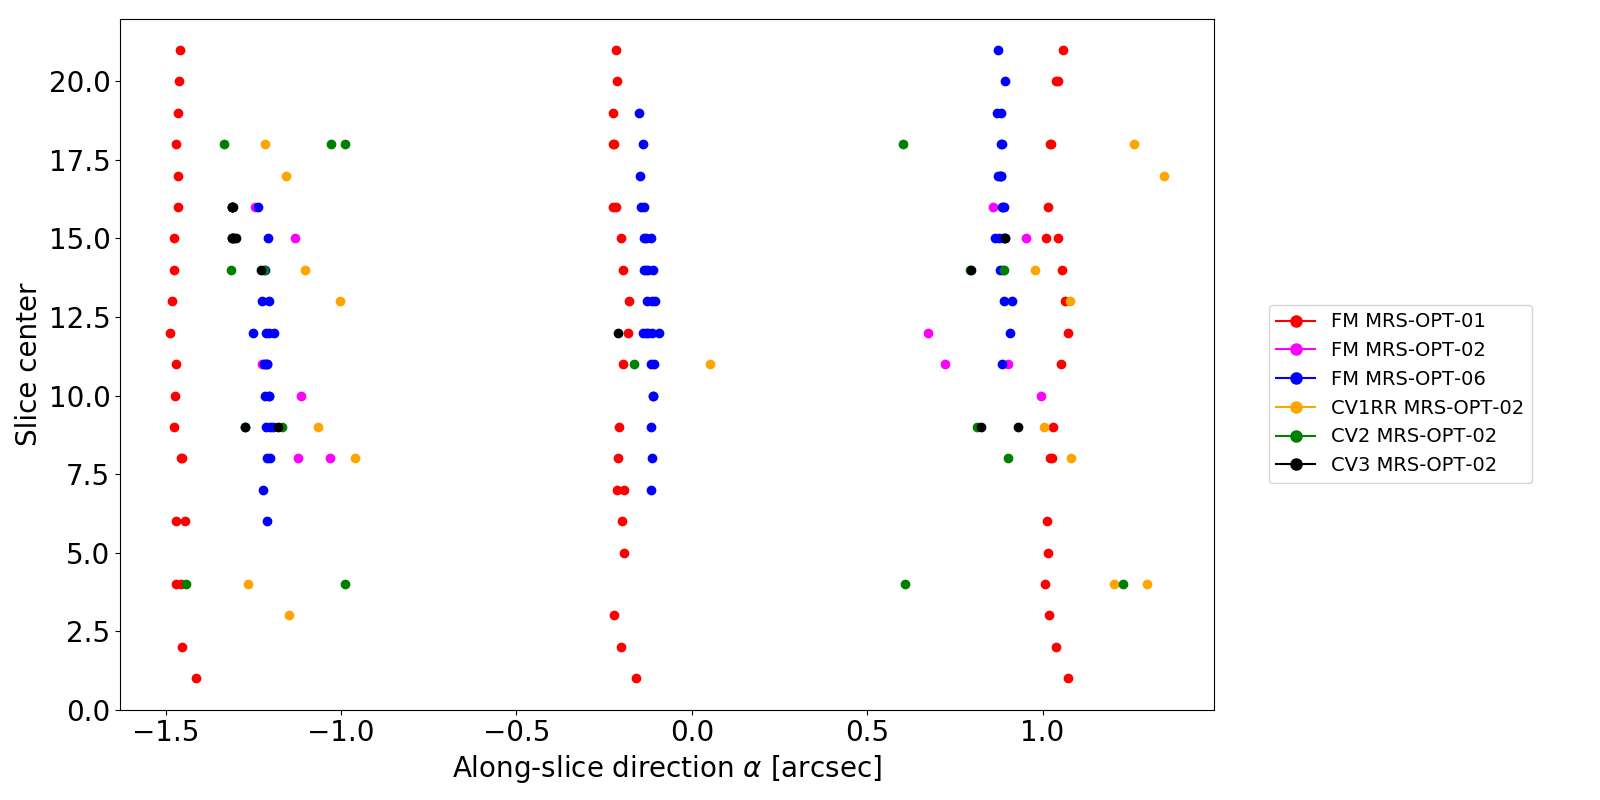

In [4]:
plt.figure(figsize=(16,8))
for pointing in FM_MRS_OPT_01_raster_centroid.keys():
    key = pointing
    plt.plot(np.mean(FM_MRS_OPT_01_raster_centroid[key][2][~np.isnan(FM_MRS_OPT_01_raster_centroid[key][2])]),FM_MRS_OPT_01_raster_centroid[key][0],'ro')
for pointing in FM_MRS_OPT_02_centroid.keys():
    key = pointing
    plt.plot(np.mean(FM_MRS_OPT_02_centroid[key][2][~np.isnan(FM_MRS_OPT_02_centroid[key][2])]),FM_MRS_OPT_02_centroid[key][0],'o',color='magenta')
for pointing in FM_MRS_OPT_06_leftraster_centroid.keys():
    key = pointing
    plt.plot(np.mean(FM_MRS_OPT_06_leftraster_centroid[key][2][~np.isnan(FM_MRS_OPT_06_leftraster_centroid[key][2])]),FM_MRS_OPT_06_leftraster_centroid[key][0],'bo')
for pointing in FM_MRS_OPT_06_middleraster_centroid.keys():
    key = pointing
    plt.plot(np.mean(FM_MRS_OPT_06_middleraster_centroid[key][2][~np.isnan(FM_MRS_OPT_06_middleraster_centroid[key][2])]),FM_MRS_OPT_06_middleraster_centroid[key][0],'bo')
for pointing in FM_MRS_OPT_06_rightraster_centroid.keys():
    key = pointing
    plt.plot(np.mean(FM_MRS_OPT_06_rightraster_centroid[key][2][~np.isnan(FM_MRS_OPT_06_rightraster_centroid[key][2])]),FM_MRS_OPT_06_rightraster_centroid[key][0],'bo')
for pointing in CV1RR_MRS_OPT_02_centroid.keys():
    key = pointing
    plt.plot(np.mean(CV1RR_MRS_OPT_02_centroid[key][2][~np.isnan(CV1RR_MRS_OPT_02_centroid[key][2])]),CV1RR_MRS_OPT_02_centroid[key][0],'o',color='orange')
for pointing in CV2_MRS_OPT_02_centroid.keys():
    key = pointing
    plt.plot(np.mean(CV2_MRS_OPT_02_centroid[key][2][~np.isnan(CV2_MRS_OPT_02_centroid[key][2])]),CV2_MRS_OPT_02_centroid[key][0],'go')
for pointing in CV3_MRS_OPT_02_centroid.keys():
    key = pointing
    plt.plot(np.mean(CV3_MRS_OPT_02_centroid[key][2][~np.isnan(CV3_MRS_OPT_02_centroid[key][2])]),CV3_MRS_OPT_02_centroid[key][0],'ko')
plt.xlabel(r'Along-slice direction $\alpha$ [arcsec]')
plt.ylabel('Slice center')
legend_elements = [Line2D([0],[0],marker='o',color='r',label='FM MRS-OPT-01',markerfacecolor='r',markersize=8),
                   Line2D([0],[0],marker='o',color='magenta',label='FM MRS-OPT-02',markerfacecolor='magenta',markersize=8),
                   Line2D([0],[0],marker='o',color='b',label='FM MRS-OPT-06',markerfacecolor='b',markersize=8),
                   Line2D([0],[0],marker='o',color='orange',label='CV1RR MRS-OPT-02',markerfacecolor='orange',markersize=8),
                   Line2D([0],[0],marker='o',color='g',label='CV2 MRS-OPT-02',markerfacecolor='g',markersize=8),
                   Line2D([0],[0],marker='o',color='k',label='CV3 MRS-OPT-02',markerfacecolor='k',markersize=8)]
plt.legend(handles=legend_elements,bbox_to_anchor=(1.3,0.6))
plt.tight_layout(rect=[0,0,0.77,1])

In [4]:
# select pointing and calibrate data
point_source_sci,point_source_bkg = mrsobs.FM_MTS_800K_BB_MRS_OPT_01_raster(lvl2path,pointing='P37') # mrsobs.FM_MTS_800K_BB_MRS_OPT_06_raster(lvl2path,position='middle',pointing='P1')
point_source_bkgsubtr = point_source_sci-point_source_bkg
point_source_oddevencorr = funcs.OddEvenRowSignalCorrection(point_source_bkgsubtr)

In [5]:
# Pixel trace in MRS slice
ypos,xpos = funcs.detpixel_trace_compactsource(point_source_oddevencorr,band,d2cMaps,offset_slice=-1)
xpos_offsets = [-2,-1,0,1,2]
xpos_offset = 1

In [6]:
while len(np.where(lambdaMap[ypos,xpos+xpos_offset]==0)[0]) !=0:
    xpos[lambdaMap[ypos,xpos+xpos_offset]==0]+=1

wavl = lambdaMap[ypos,xpos+xpos_offset]
wvnr = np.flipud(10000./wavl)
assert len(np.where(lambdaMap[ypos,xpos+xpos_offset]==0)[0]) ==0,'Check wavelength array for zeros!'

nFringes = 0.1710 * 2. * (wvnr[-1]-wvnr[0])
nPix = 1024.
print nFringes,4*nPix/nFringes/1.6
print 2.*nPix/nFringes

71.3914952699 35.8586129947
28.6868903958


<IPython.core.display.Javascript object>


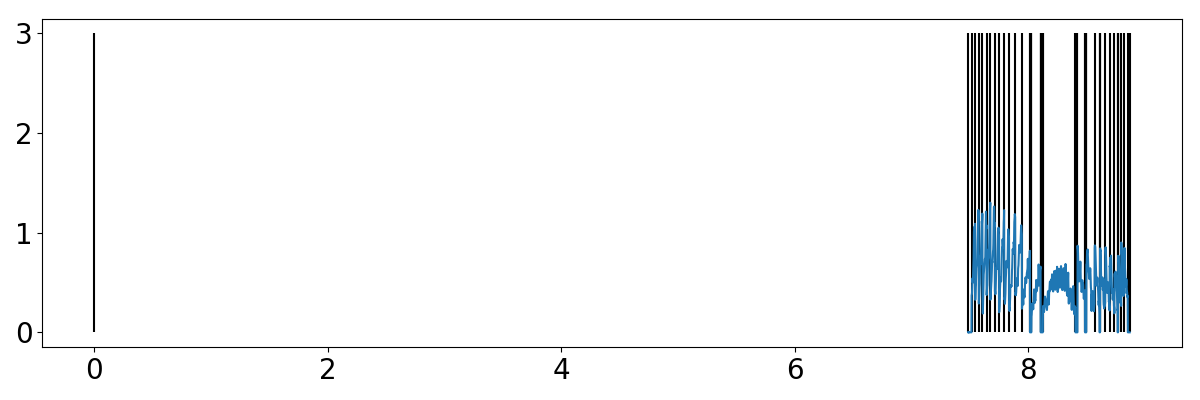

<IPython.core.display.Javascript object>


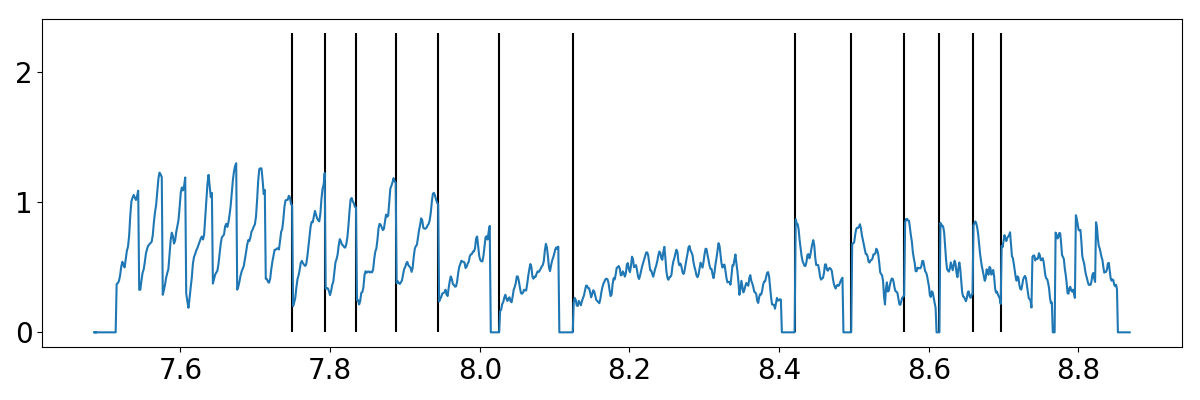

In [8]:
signal = point_source_oddevencorr[ypos,xpos+xpos_offset]
discont_idxs = np.where(np.diff(xpos)!=0)[0]
for i in range(len(discont_idxs)-1):
    if discont_idxs[i+1]-discont_idxs[i] < 20:
        signal[discont_idxs[i]:discont_idxs[i+1]+1] = 0
sel_discont_wvl = discont_idxs[np.where(np.diff(discont_idxs) >2.*nPix/nFringes)[0]]

plt.figure(figsize=(12,4))
plt.vlines(lambdaMap[ypos[np.diff(xpos)!=0],xpos[np.diff(xpos)!=0]-1],0,3)
plt.plot(wavl,signal)
# plt.xlim(4.8,5.8)
plt.tight_layout()

plt.figure(figsize=(12,4))
plt.plot(wavl[:-1],signal[:-1])
plt.vlines(wavl[sel_discont_wvl],0,2.3)
# plt.xlim(4.8,5.8)
plt.tight_layout()

<IPython.core.display.Javascript object>


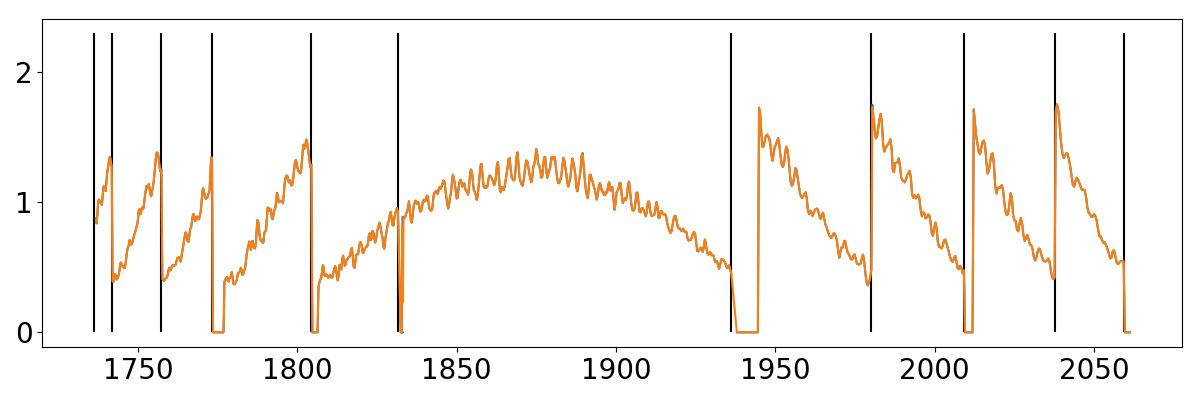

In [41]:
arr  = np.flipud(signal)

new_wvnr = np.linspace(wvnr[~np.isinf(wvnr)][0],wvnr[~np.isinf(wvnr)][-1],4*nPix)
interp = scp_interpolate.interp1d(wvnr,arr)
new_arr = interp(new_wvnr)

# peaks = funcs.norm_fringe(new_arr,min_dist=4*nPix/nFringes/1.6,k=1,ext=0)

sel_discont_wvnr = np.flipud(len(wavl)-sel_discont_wvl-2)
if sel_discont_wvnr[0] !=0:
    sel_discont_wvnr = np.concatenate([np.array([0]),sel_discont_wvnr])

plt.figure(figsize=(12,4))
plt.plot(wvnr,arr)
plt.plot(new_wvnr,new_arr)
# plt.plot(new_wvnr[peaks[1]],new_arr[peaks[1]],'ro')
plt.vlines(wvnr[sel_discont_wvnr],0,2.3)
plt.tight_layout()

<IPython.core.display.Javascript object>


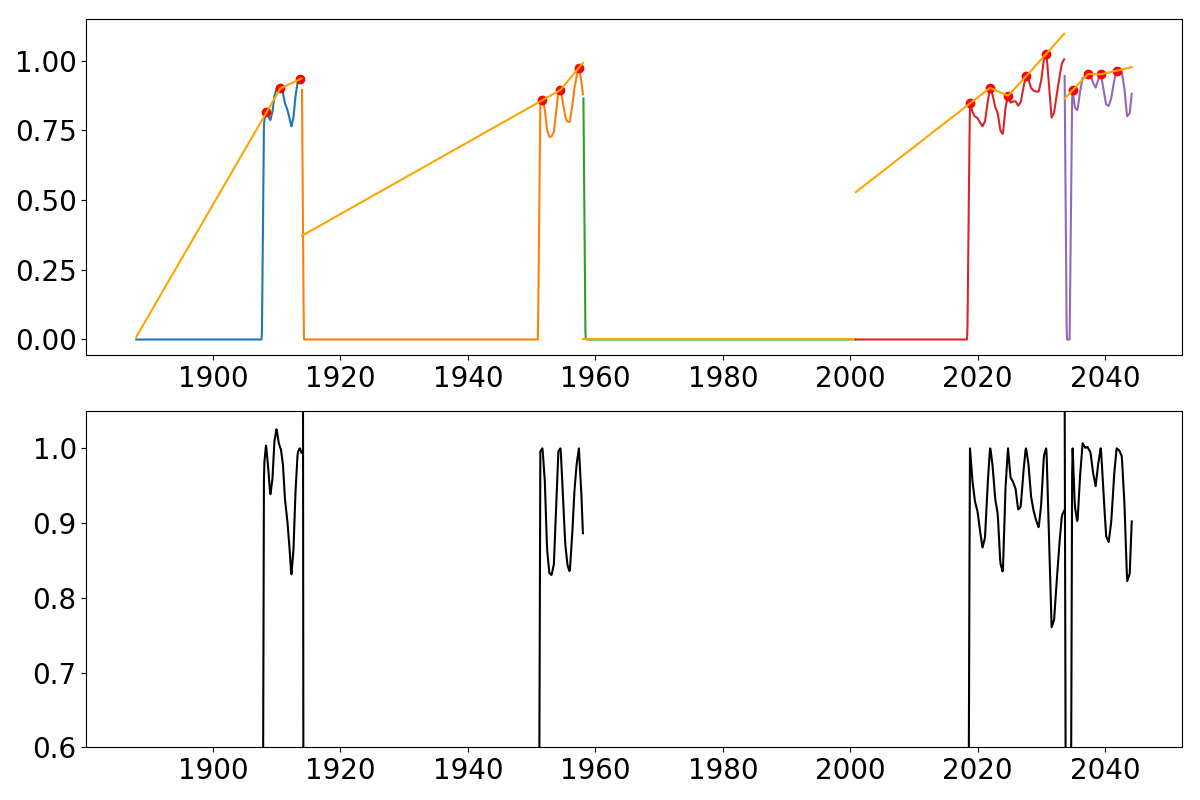

0.0
0.0
0.0
0.198541181877
0.13457291666
0.00414704567364
0.396992044122
0.830660188451


In [10]:
fig,axs = plt.subplots(2,1,figsize=(12,8))
for i in range(len(sel_discont_wvnr)-1):
    idx1,idx2 = funcs.find_nearest(new_wvnr,wvnr[sel_discont_wvnr[i]]),funcs.find_nearest(new_wvnr,wvnr[sel_discont_wvnr[i+1]])
    if np.mean(new_arr[idx1:idx2][~np.isnan(new_arr[idx1:idx2])]) == 0.:
        continue
    norm_fringe = funcs.norm_fringe(new_arr[idx1:idx2],min_dist=4*nPix/nFringes/1.6,k=1,ext=0)
    axs[0].plot(new_wvnr[idx1:idx2],new_arr[idx1:idx2])
    axs[0].plot(new_wvnr[idx1:idx2][norm_fringe[1]],new_arr[idx1:idx2][norm_fringe[1]],'ro')
    axs[0].plot(new_wvnr[idx1:idx2],norm_fringe[2],'orange')
    axs[1].plot(new_wvnr[idx1:idx2],norm_fringe[0]/norm_fringe[2],'k')
axs[1].set_ylim(0.6,1.05)
plt.tight_layout()

Now check offset = -2

In [11]:
ypos,xpos = funcs.detpixel_trace_compactsource(point_source_oddevencorr,band,d2cMaps,offset_slice=0)

xpos_offset = -2
if len(np.where(lambdaMap[ypos,xpos+xpos_offset]==0)[0]) !=0:
    xpos[lambdaMap[ypos,xpos+xpos_offset]==0]+=1
if len(np.where(lambdaMap[ypos,xpos+xpos_offset]==0)[0]) !=0:
    xpos[lambdaMap[ypos,xpos+xpos_offset]==0]+=1

wavl = lambdaMap[ypos,xpos+xpos_offset]
wvnr = np.flipud(10000./wavl)
assert len(np.where(wavl==0)[0]) ==0,'Check wavelength array for zeros!'

nFringes = 0.1710 * 2. * (wvnr[-1]-wvnr[0])
nPix = 1024.
print nFringes,4*nPix/nFringes/1.6
print 2.*nPix/nFringes

110.622797073 23.1417037692
18.5133630154


<IPython.core.display.Javascript object>


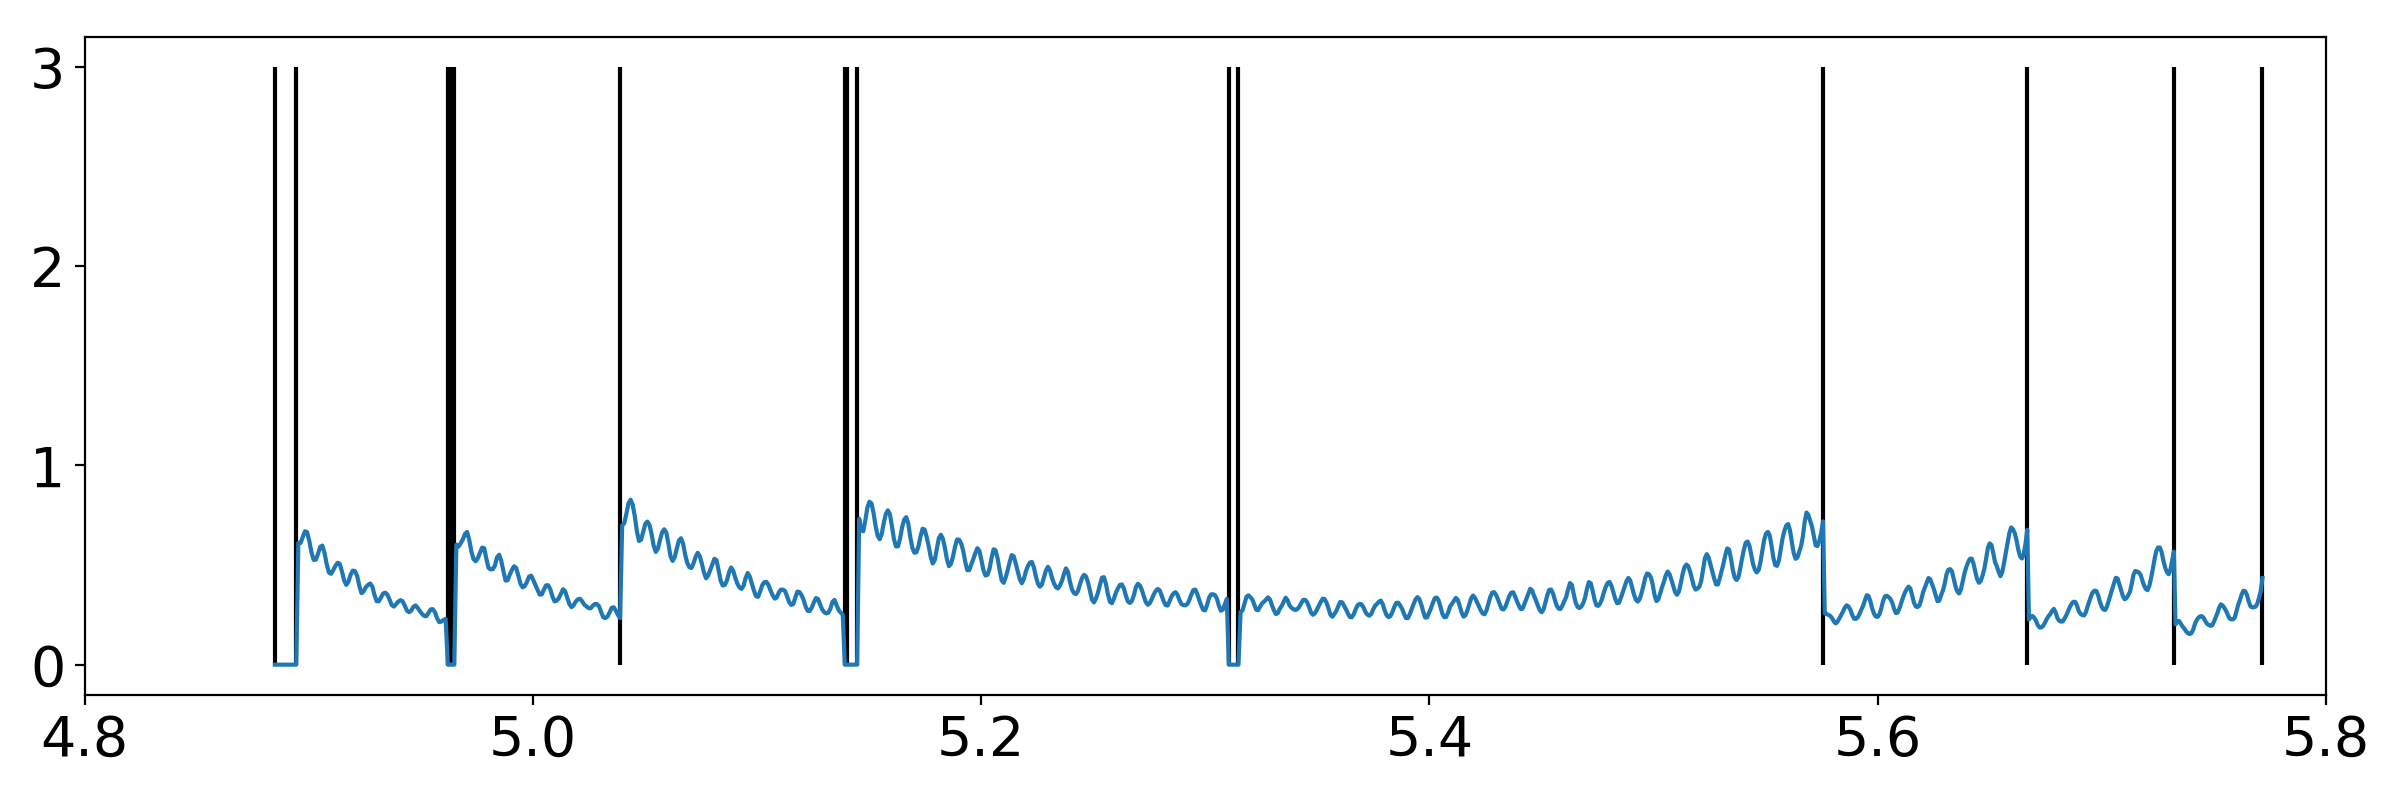

<IPython.core.display.Javascript object>


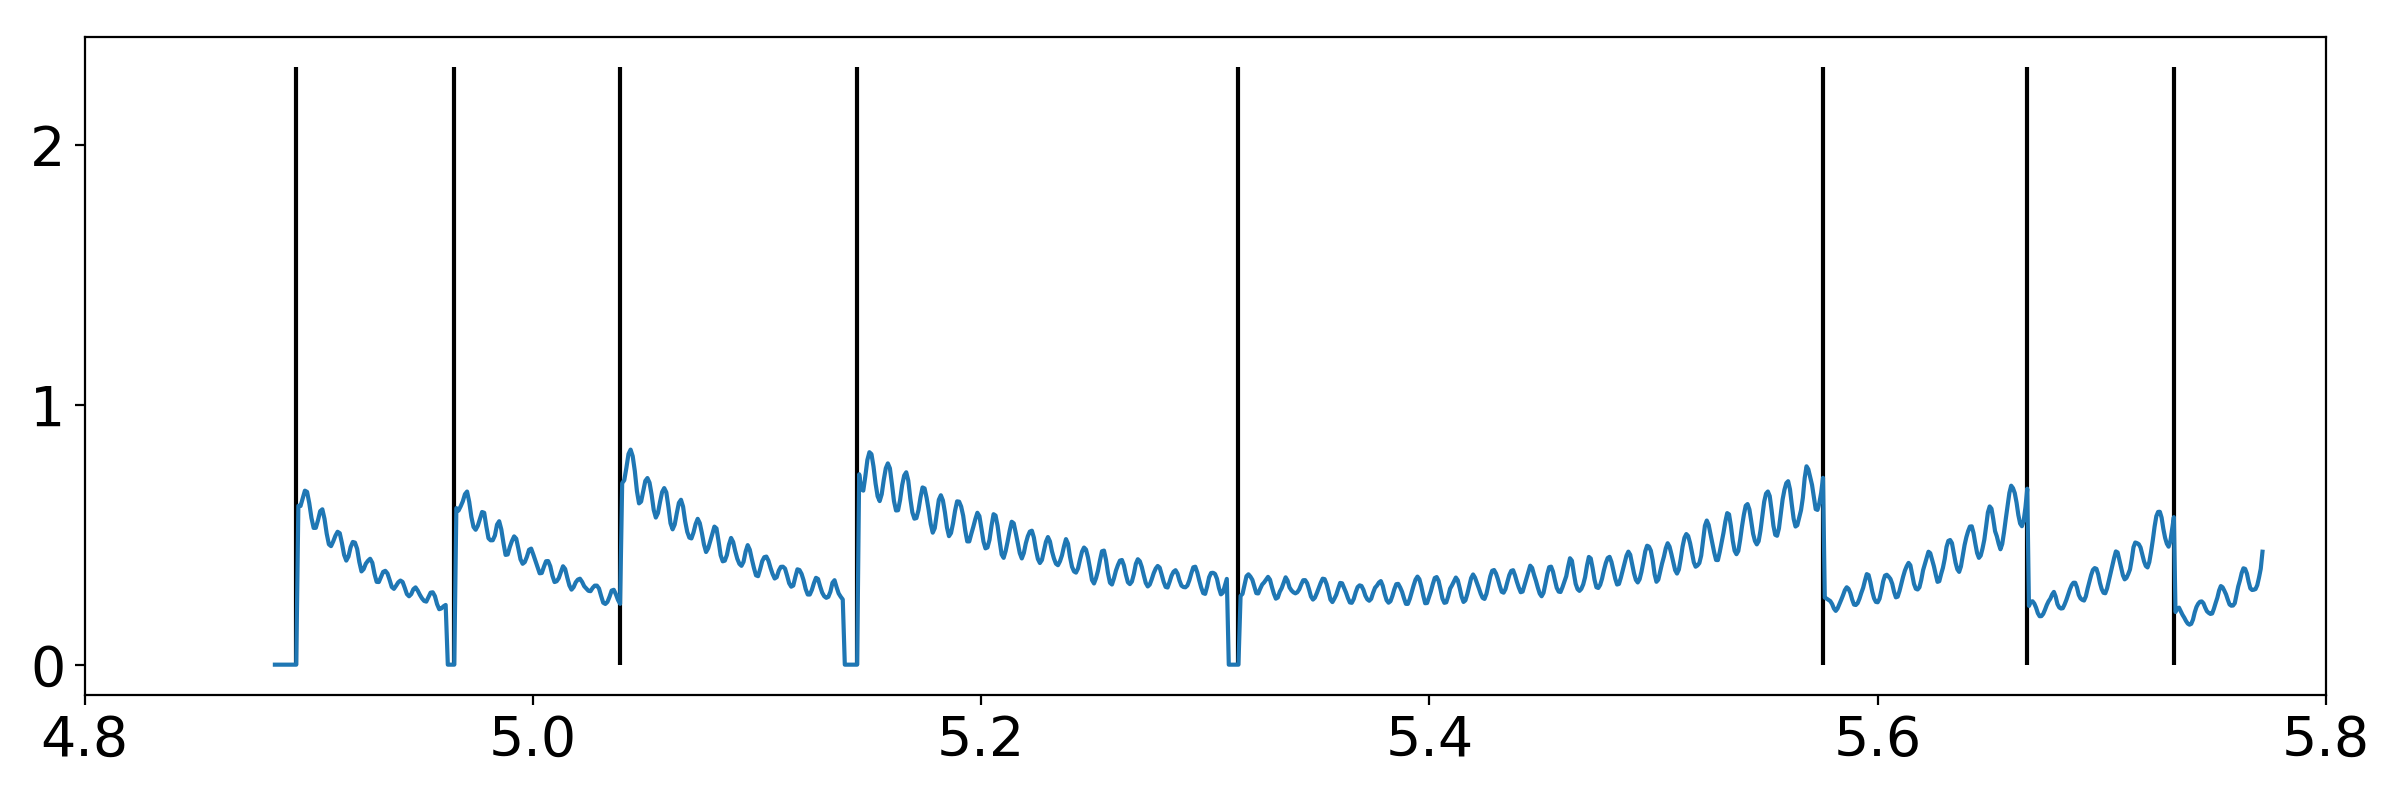

In [39]:
signal = point_source_oddevencorr[ypos,xpos+xpos_offset]
discont_idxs = np.where(np.diff(xpos)!=0)[0]
for i in range(len(discont_idxs)-2):
    if discont_idxs[i+1]-discont_idxs[i] < 20:
        signal[discont_idxs[i]:discont_idxs[i+1]+1] = 0
sel_discont_wvl = discont_idxs[np.where(np.diff(discont_idxs) >2.*nPix/nFringes)[0]]

plt.figure(figsize=(12,4))
plt.vlines(lambdaMap[ypos[np.diff(xpos)!=0],xpos[np.diff(xpos)!=0]+xpos_offset],0,3)
plt.plot(wavl,signal)
plt.xlim(4.8,5.8)
plt.tight_layout()

plt.figure(figsize=(12,4))
plt.plot(wavl[:-1],signal[:-1])
plt.vlines(wavl[sel_discont_wvl],0,2.3)
plt.xlim(4.8,5.8)
plt.tight_layout()

<IPython.core.display.Javascript object>


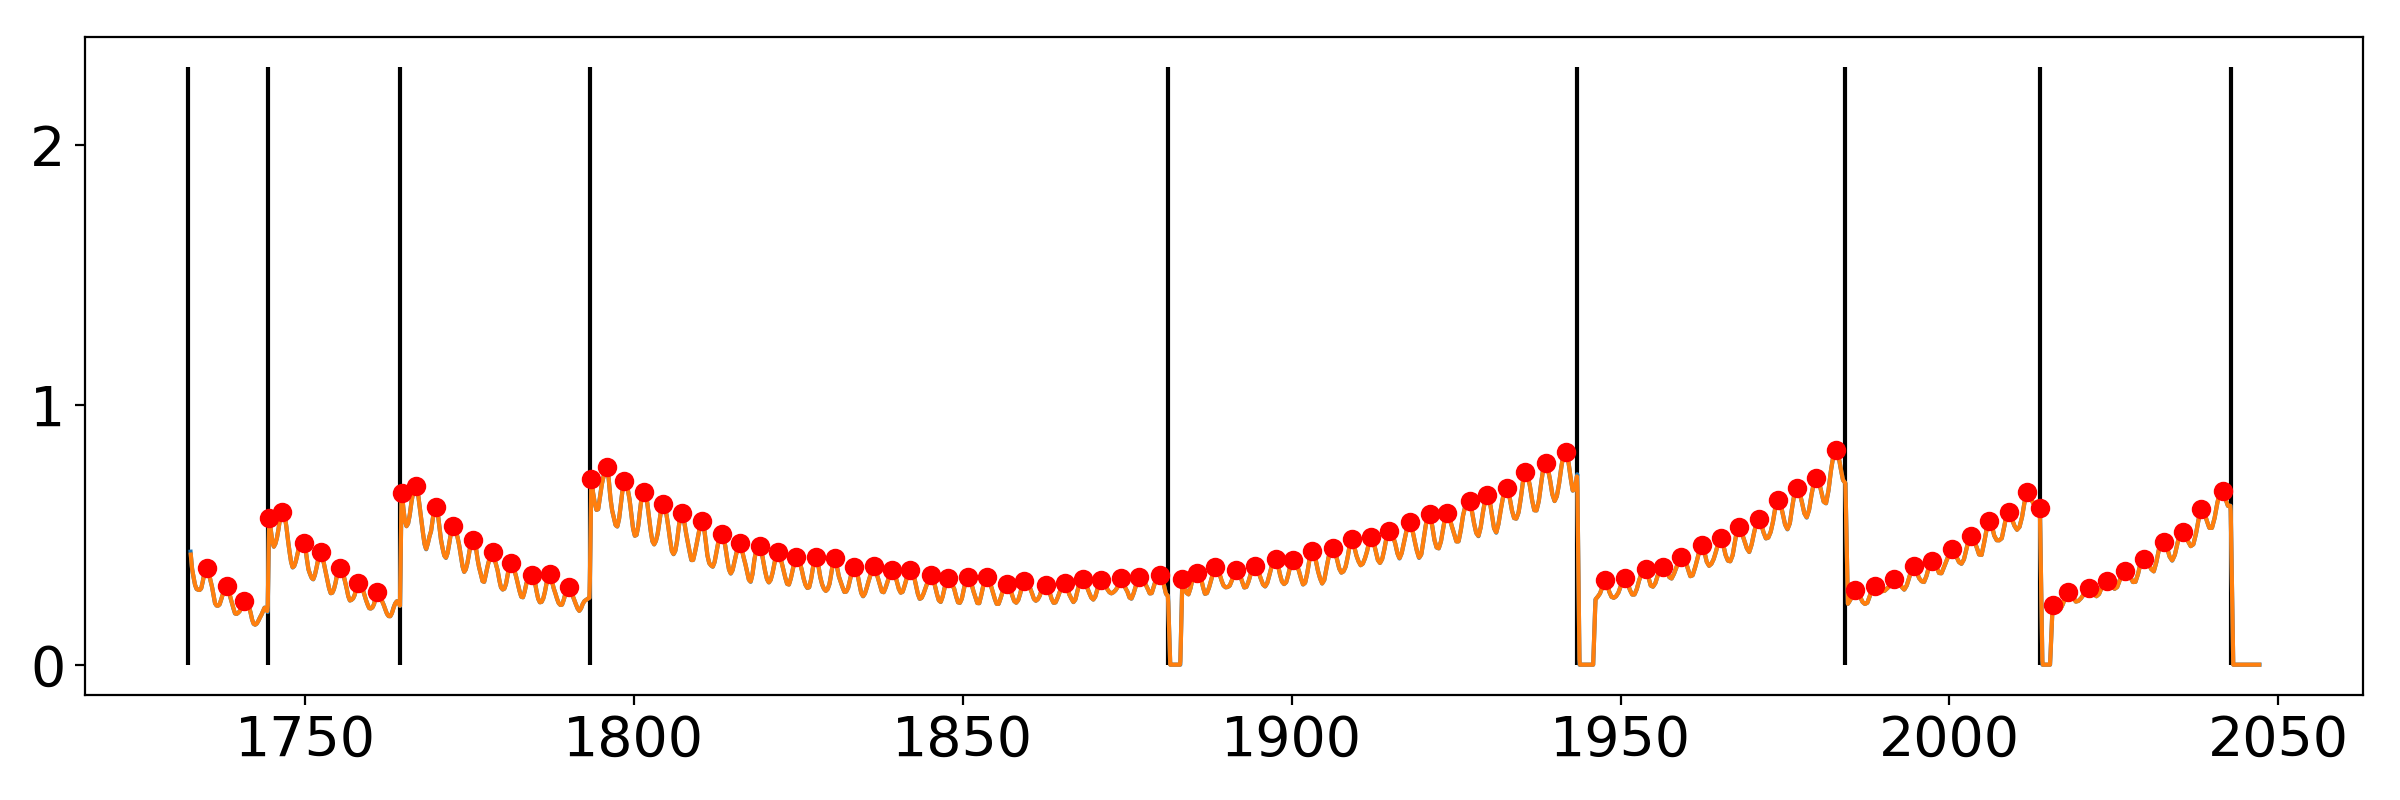

In [40]:
arr  = np.flipud(signal)

new_wvnr = np.linspace(wvnr[~np.isinf(wvnr)][0],wvnr[~np.isinf(wvnr)][-1],4*nPix)
interp = scp_interpolate.interp1d(wvnr,arr)
new_arr = interp(new_wvnr)

peaks = funcs.norm_fringe(new_arr,min_dist=4*nPix/nFringes/1.6,k=1,ext=0)

sel_discont_wvnr = np.flipud(len(wavl)-sel_discont_wvl-2)
if sel_discont_wvnr[0] !=0:
    sel_discont_wvnr = np.concatenate([np.array([0]),sel_discont_wvnr])

plt.figure(figsize=(12,4))
plt.plot(wvnr,arr)
plt.plot(new_wvnr,new_arr)
plt.plot(new_wvnr[peaks[1]],new_arr[peaks[1]],'ro')
plt.vlines(wvnr[sel_discont_wvnr],0,2.3)
plt.tight_layout()

<IPython.core.display.Javascript object>


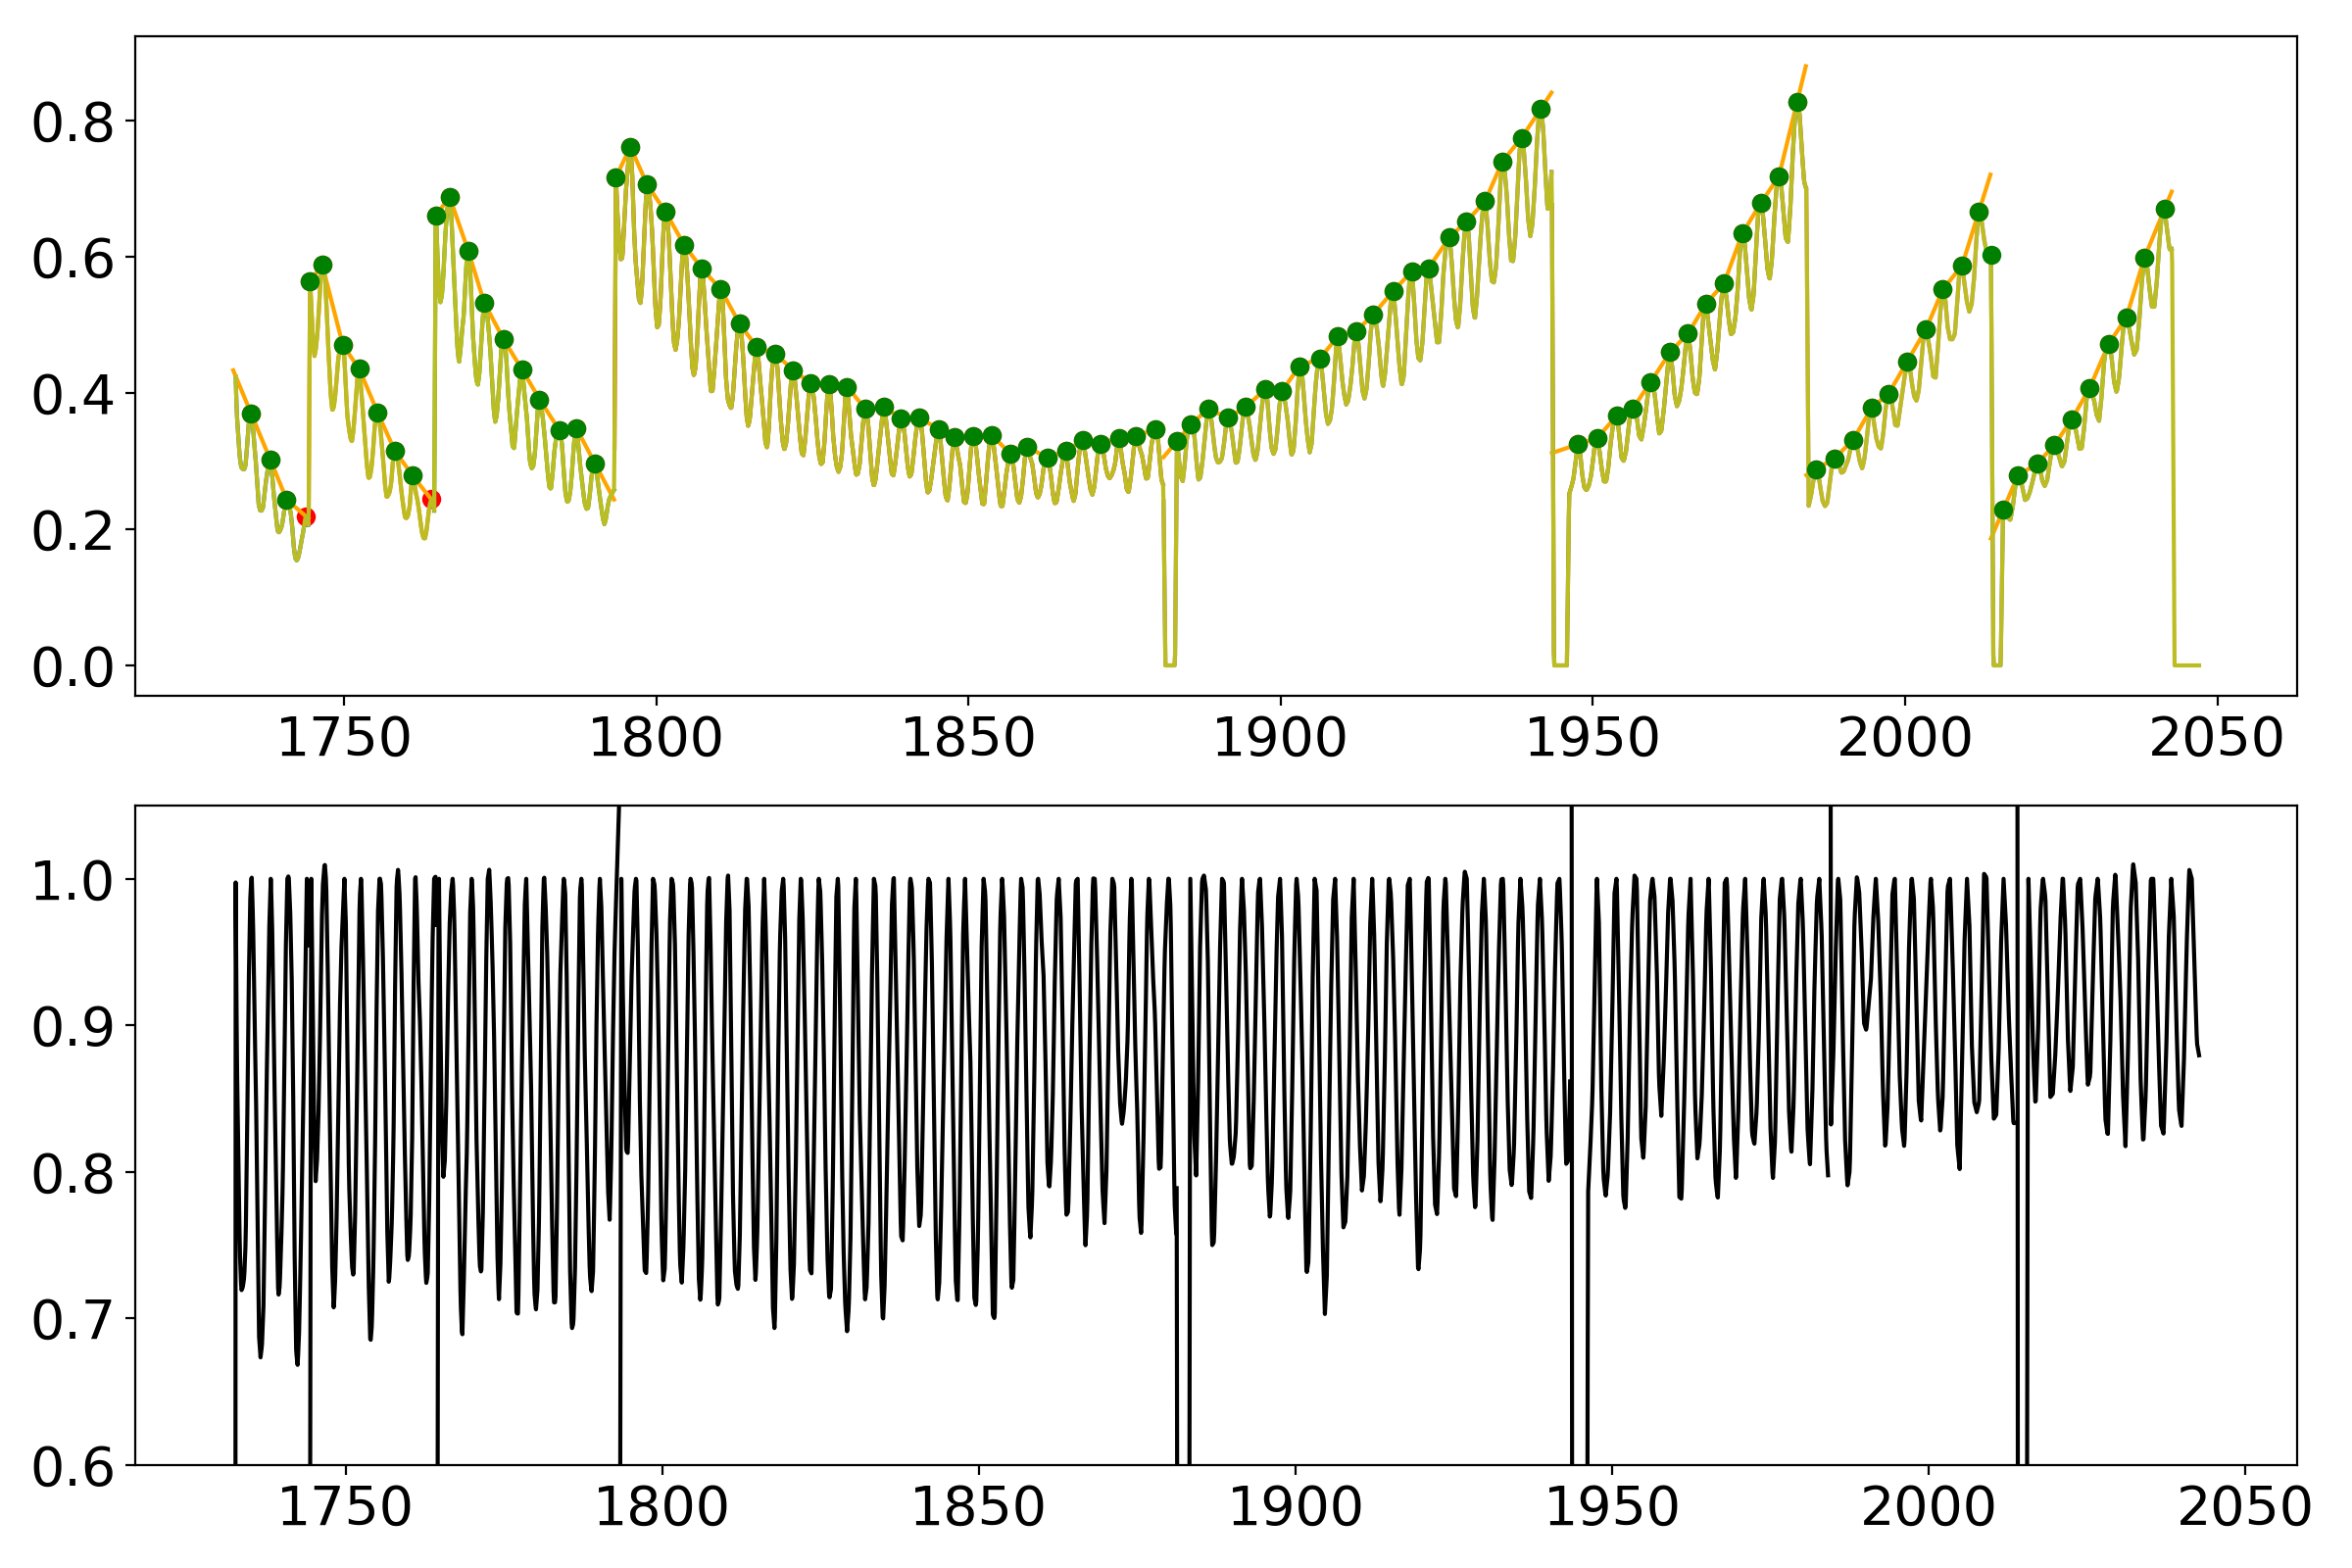

In [41]:
fig,axs = plt.subplots(2,1,figsize=(12,8))
for i in range(len(sel_discont_wvnr)-1):
    idx1,idx2 = funcs.find_nearest(new_wvnr,wvnr[sel_discont_wvnr[i]]),funcs.find_nearest(new_wvnr,wvnr[sel_discont_wvnr[i+1]])
    norm_fringe = funcs.norm_fringe(new_arr[idx1:idx2],min_dist=4*nPix/nFringes/1.6,k=1,ext=0)
    axs[0].plot(new_wvnr[idx1:idx2],new_arr[idx1:idx2])
    axs[0].plot(new_wvnr[idx1:idx2][norm_fringe[1]],new_arr[idx1:idx2][norm_fringe[1]],'ro')
    axs[0].plot(new_wvnr[idx1:idx2],norm_fringe[2],'orange')
    axs[1].plot(new_wvnr[idx1:idx2],norm_fringe[0]/norm_fringe[2],'k')
axs[0].plot(new_wvnr,new_arr)
axs[0].plot(new_wvnr[peaks[1]],new_arr[peaks[1]],'go')
axs[1].set_ylim(0.6,1.05)
plt.tight_layout()

Now check offset = +1

110.637979185 23.1385281877
18.5108225501


<IPython.core.display.Javascript object>


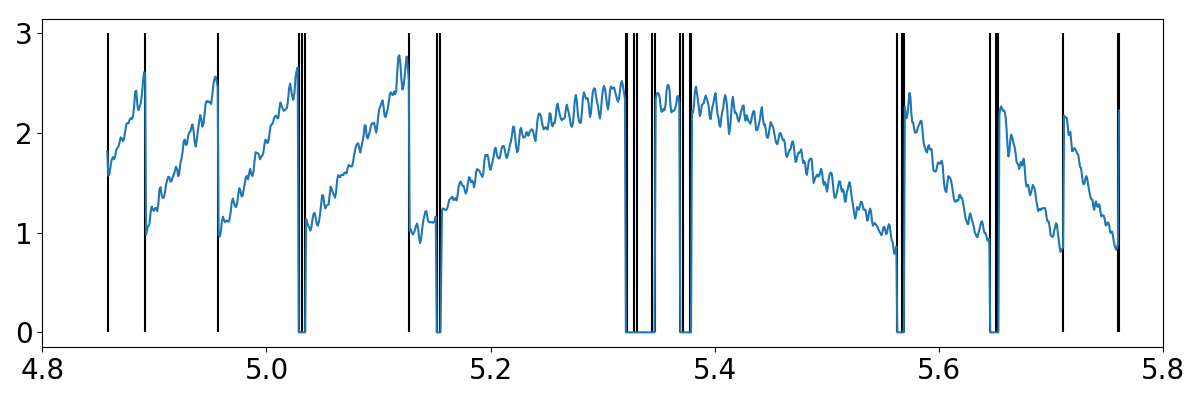

<IPython.core.display.Javascript object>


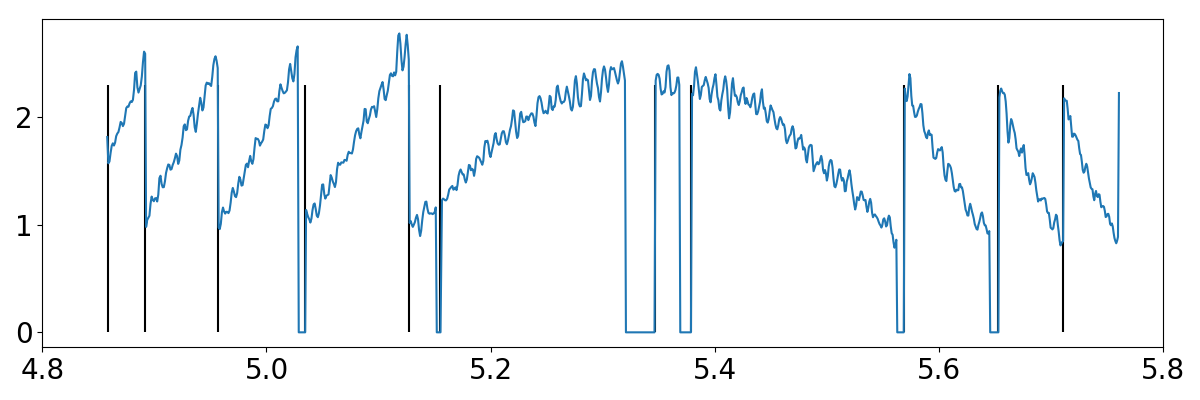

<IPython.core.display.Javascript object>


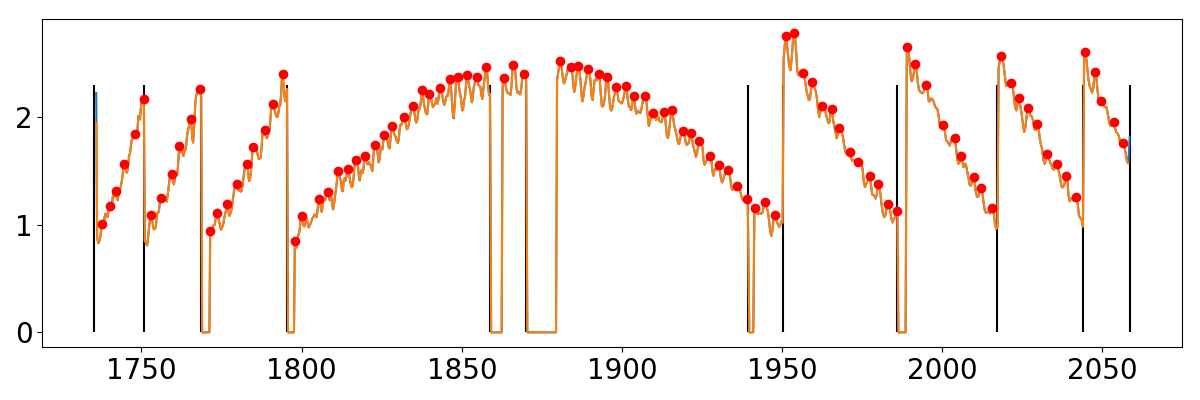

<IPython.core.display.Javascript object>


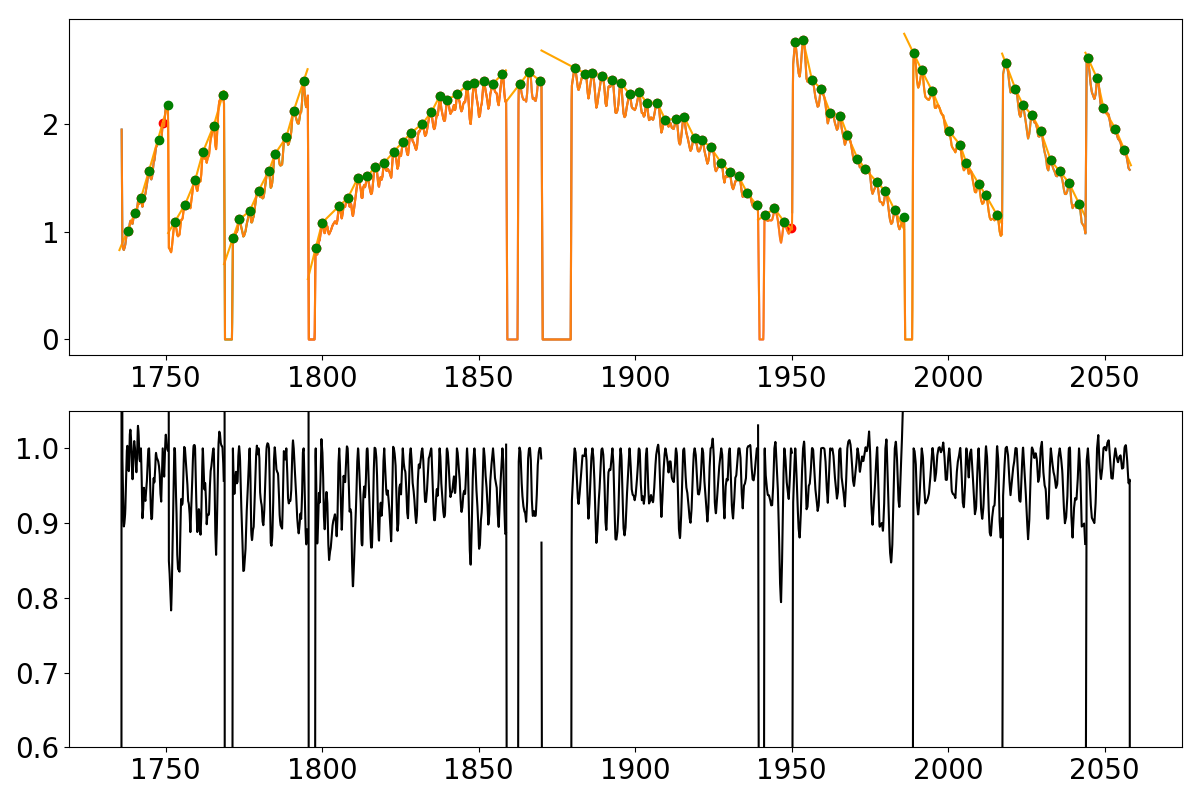

In [14]:
ypos,xpos = funcs.detpixel_trace_compactsource(point_source_oddevencorr,band,d2cMaps,offset_slice=-1)

xpos_offset = 1
if len(np.where(lambdaMap[ypos,xpos+xpos_offset]==0)[0]) !=0:
    xpos[lambdaMap[ypos,xpos+xpos_offset]==0]+=1
if len(np.where(lambdaMap[ypos,xpos+xpos_offset]==0)[0]) !=0:
    xpos[lambdaMap[ypos,xpos+xpos_offset]==0]+=1

wavl = lambdaMap[ypos,xpos+xpos_offset]
wvnr = np.flipud(10000./wavl)
assert len(np.where(lambdaMap[ypos,xpos+xpos_offset]==0)[0]) ==0,'Check wavelength array for zeros!'

nFringes = 0.1710 * 2. * (wvnr[-1]-wvnr[0])
nPix = 1024.
print nFringes,4*nPix/nFringes/1.6
print 2.*nPix/nFringes
#----------
signal = point_source_oddevencorr[ypos,xpos+xpos_offset]
discont_idxs = np.where(np.diff(xpos)!=0)[0]
for i in range(len(discont_idxs)-2):
    if discont_idxs[i+1]-discont_idxs[i] < 20:
        signal[discont_idxs[i]:discont_idxs[i+1]+1] = 0
sel_discont_wvl = discont_idxs[np.where(np.diff(discont_idxs) >2.*nPix/nFringes)[0]]

plt.figure(figsize=(12,4))
plt.vlines(lambdaMap[ypos[np.diff(xpos)!=0],xpos[np.diff(xpos)!=0]+1],0,3)
plt.plot(wavl,signal)
plt.xlim(4.8,5.8)
plt.tight_layout()

plt.figure(figsize=(12,4))
plt.plot(wavl[:-1],signal[:-1])
plt.vlines(wavl[sel_discont_wvl],0,2.3)
plt.xlim(4.8,5.8)
plt.tight_layout()
#-------------
arr  = np.flipud(signal)

new_wvnr = np.linspace(wvnr[~np.isinf(wvnr)][0],wvnr[~np.isinf(wvnr)][-1],4*nPix)
interp = scp_interpolate.interp1d(wvnr,arr)
new_arr = interp(new_wvnr)

peaks = funcs.norm_fringe(new_arr,min_dist=4*nPix/nFringes/1.6,k=1,ext=0)

sel_discont_wvnr = np.flipud(len(wavl)-sel_discont_wvl-2)
if sel_discont_wvnr[0] !=0:
    sel_discont_wvnr = np.concatenate([np.array([0]),sel_discont_wvnr])

plt.figure(figsize=(12,4))
plt.plot(wvnr,arr)
plt.plot(new_wvnr,new_arr)
plt.plot(new_wvnr[peaks[1]],new_arr[peaks[1]],'ro')
plt.vlines(wvnr[sel_discont_wvnr],0,2.3)
plt.tight_layout()
#----------------
fig,axs = plt.subplots(2,1,figsize=(12,8))
for i in range(len(sel_discont_wvnr)-1):
    idx1,idx2 = funcs.find_nearest(new_wvnr,wvnr[sel_discont_wvnr[i]]),funcs.find_nearest(new_wvnr,wvnr[sel_discont_wvnr[i+1]])
    norm_fringe = funcs.norm_fringe(new_arr[idx1:idx2],min_dist=4*nPix/nFringes/1.6,k=1,ext=0)
    axs[0].plot(new_wvnr[idx1:idx2],new_arr[idx1:idx2])
    axs[0].plot(new_wvnr[idx1:idx2][norm_fringe[1]],new_arr[idx1:idx2][norm_fringe[1]],'ro')
    axs[0].plot(new_wvnr[idx1:idx2],norm_fringe[2],'orange')
    axs[1].plot(new_wvnr[idx1:idx2],norm_fringe[0]/norm_fringe[2],'k')
axs[0].plot(new_wvnr,new_arr)
axs[0].plot(new_wvnr[peaks[1]],new_arr[peaks[1]],'go')
axs[1].set_ylim(0.6,1.05)
plt.tight_layout()

Source center slice ID: 7
108.310232582 23.6358092765
18.9086474212


<IPython.core.display.Javascript object>


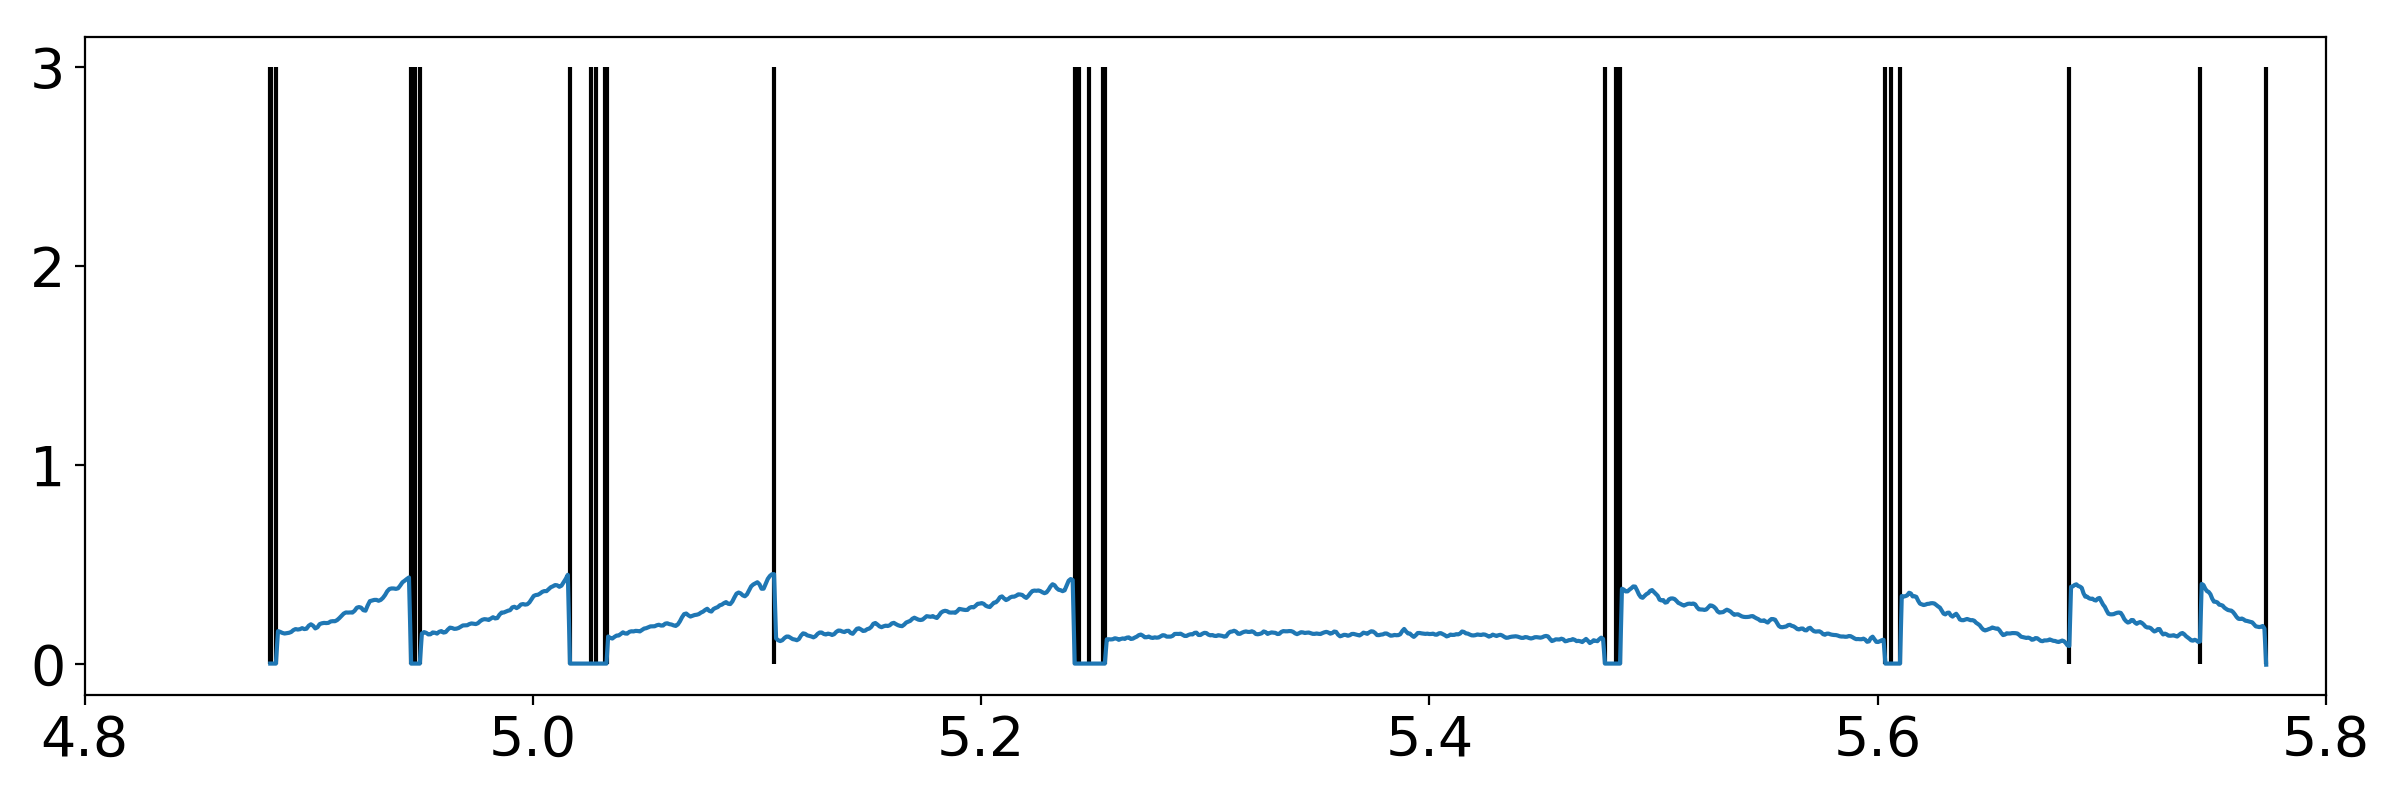

<IPython.core.display.Javascript object>


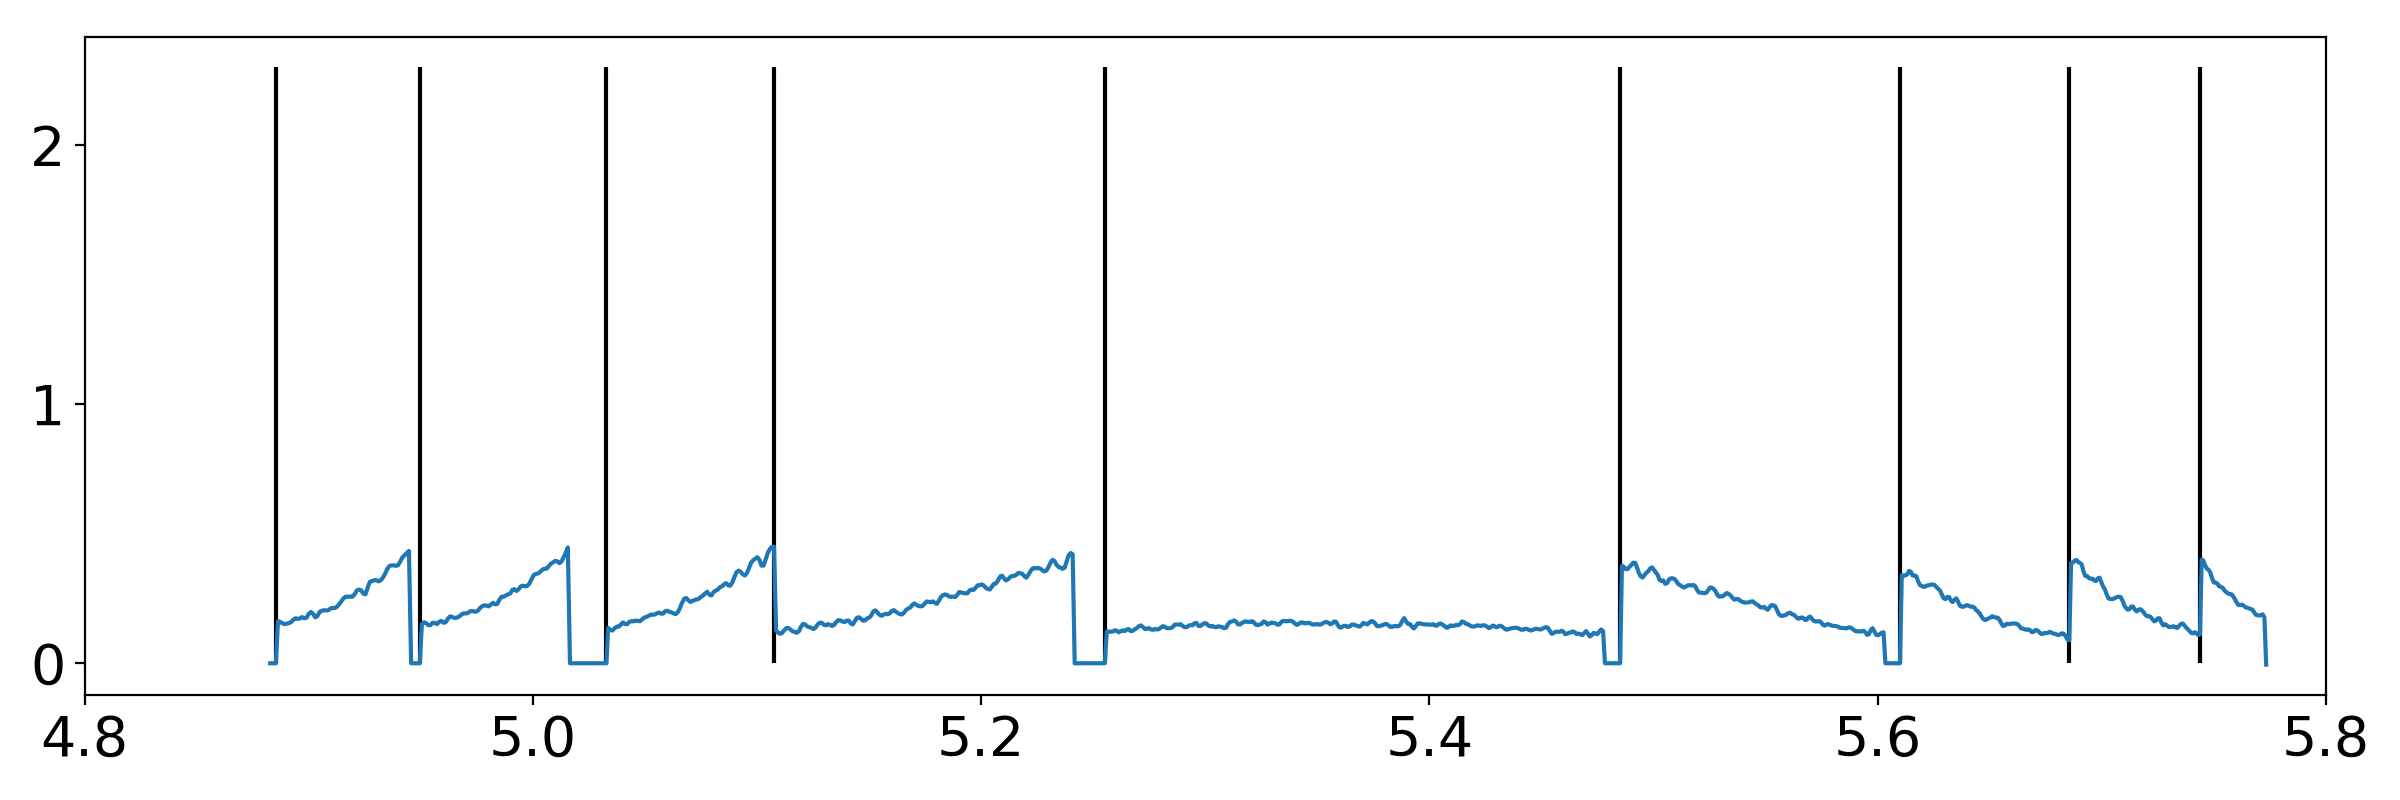

<IPython.core.display.Javascript object>


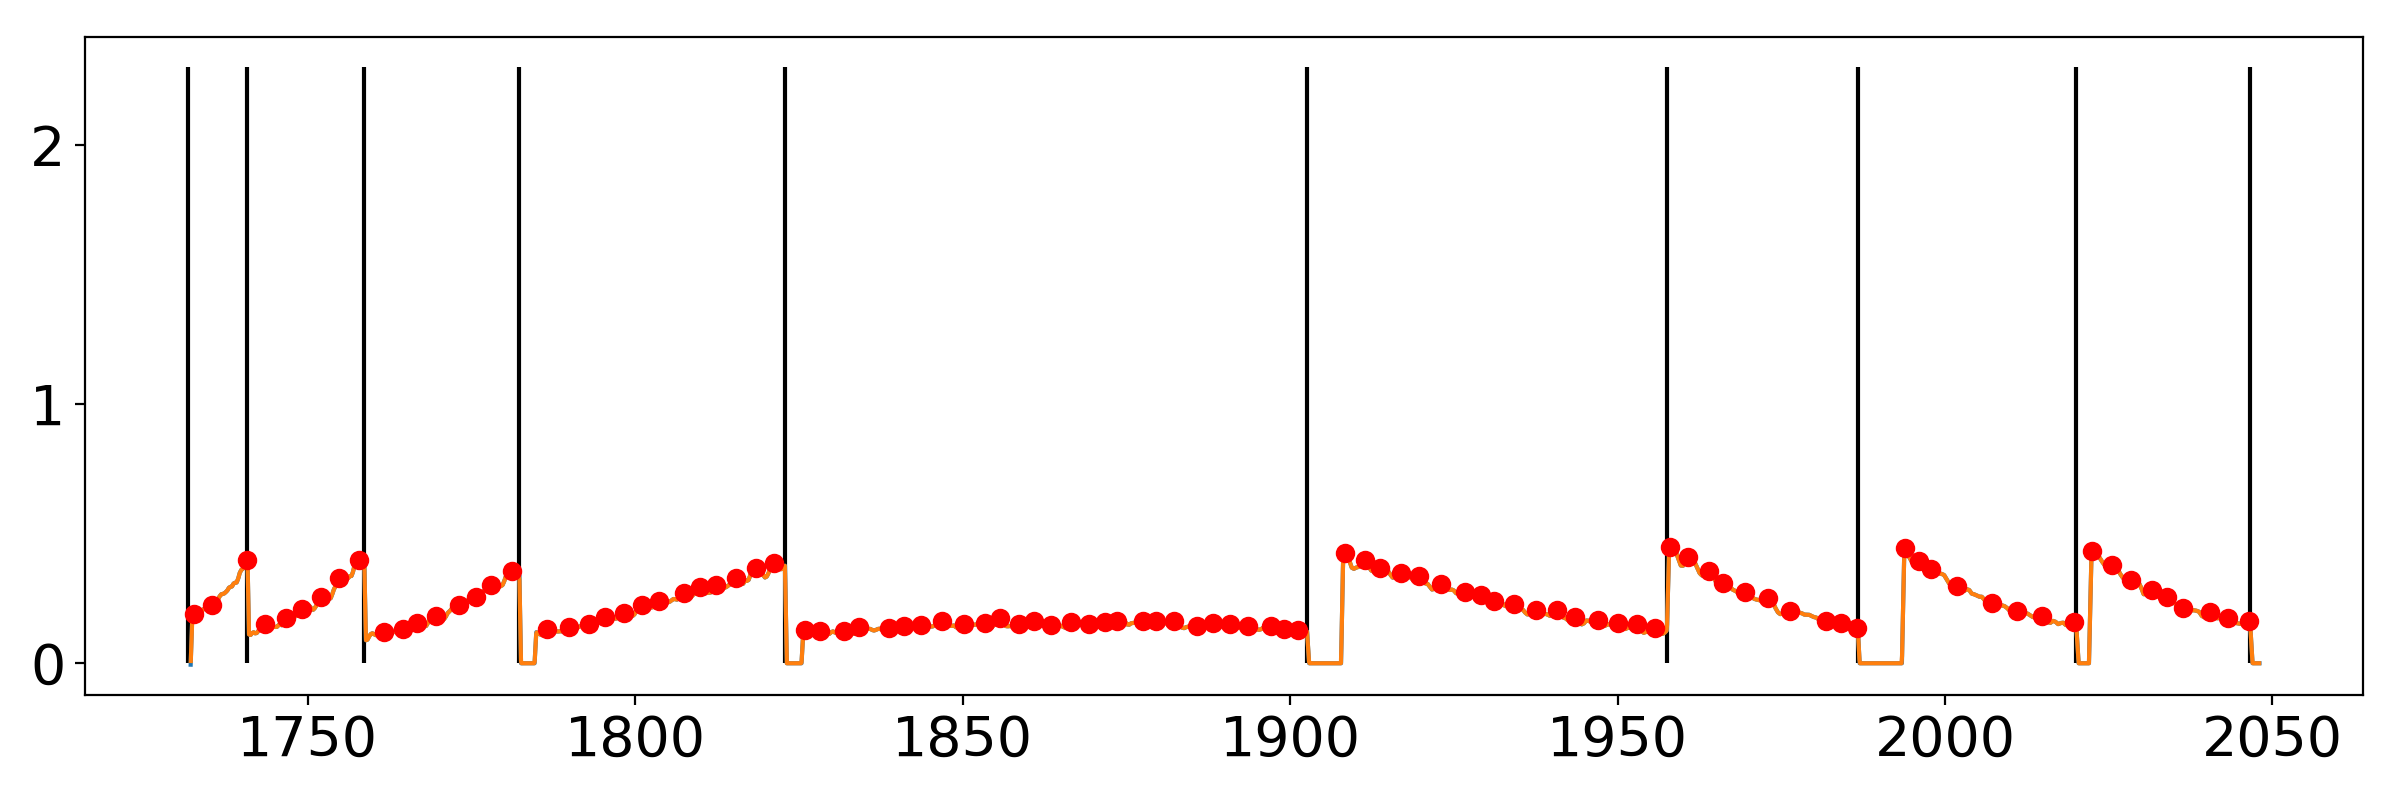

<IPython.core.display.Javascript object>


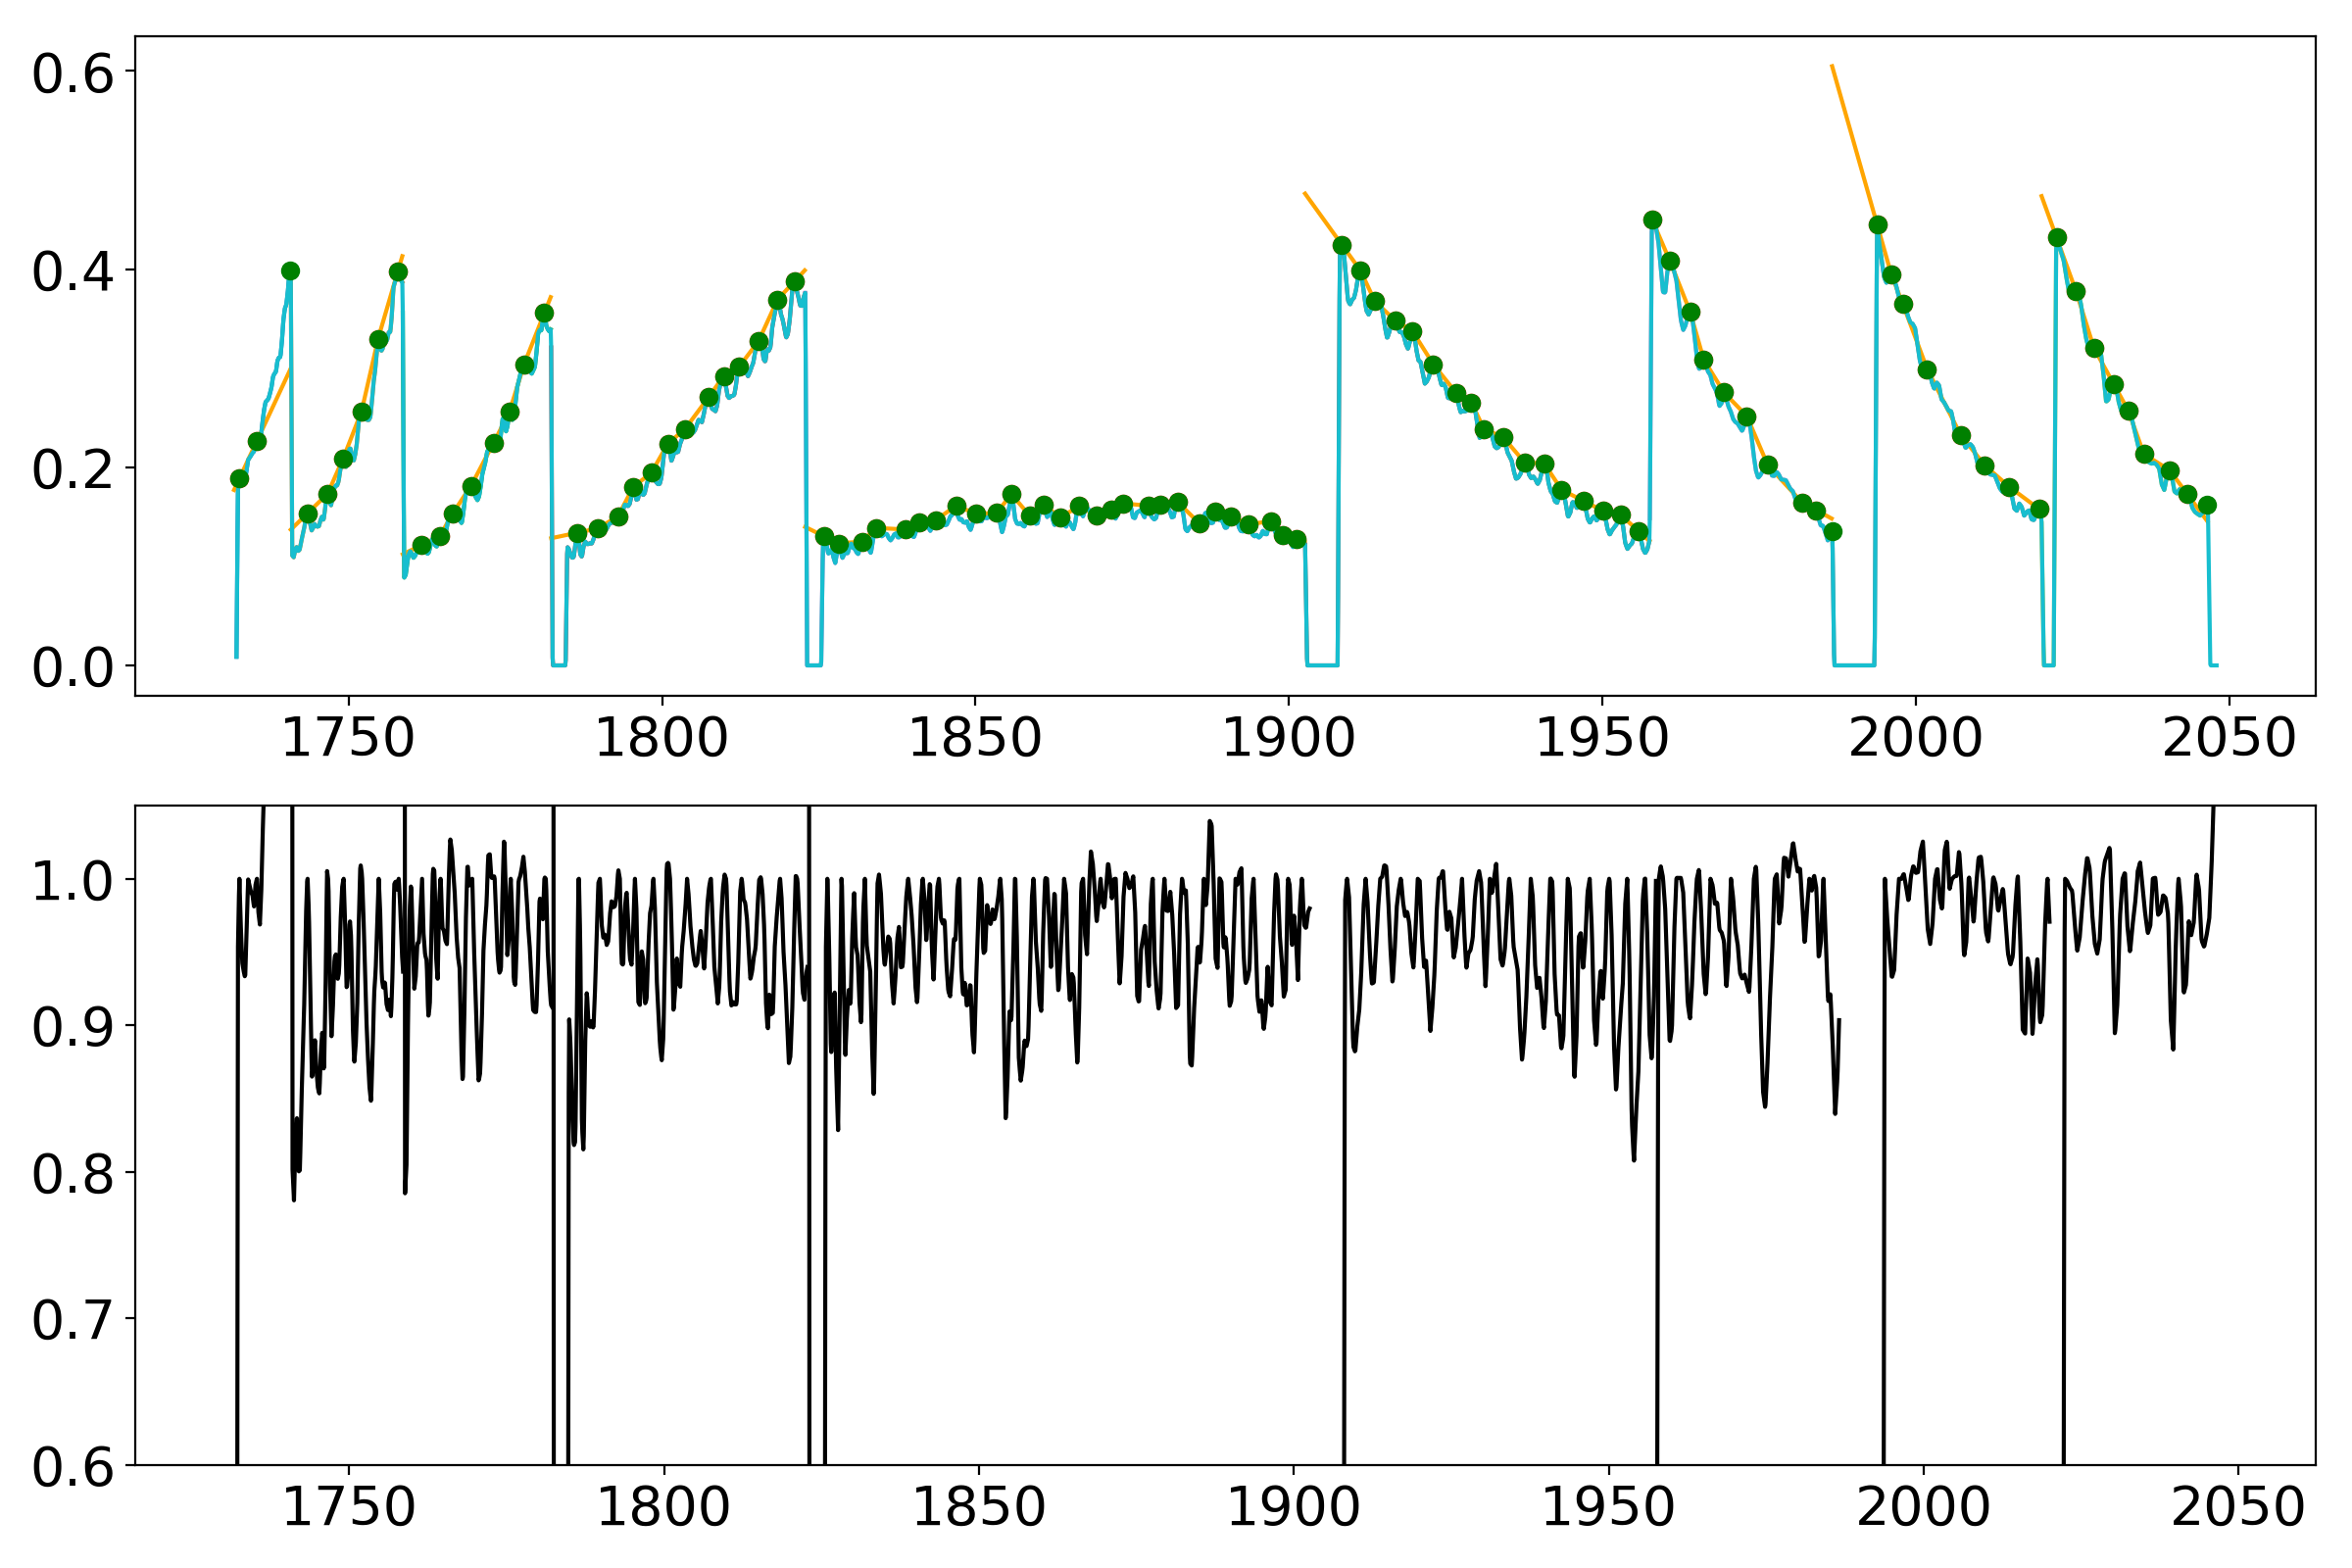

In [33]:
ypos,xpos = funcs.detpixel_trace_compactsource(point_source_oddevencorr,band,d2cMaps,offset_slice=-1)

xpos_offset = 2
if len(np.where(lambdaMap[ypos,xpos+xpos_offset]==0)[0]) !=0:
    xpos[lambdaMap[ypos,xpos+xpos_offset]==0]+=1
if len(np.where(lambdaMap[ypos,xpos+xpos_offset]==0)[0]) !=0:
    xpos[lambdaMap[ypos,xpos+xpos_offset]==0]+=1

wavl = lambdaMap[ypos,xpos+xpos_offset]
wvnr = np.flipud(10000./wavl)
assert len(np.where(lambdaMap[ypos,xpos+xpos_offset]==0)[0]) ==0,'Check wavelength array for zeros!'

nFringes = 0.1710 * 2. * (wvnr[-1]-wvnr[0])
nPix = 1024.
print nFringes,4*nPix/nFringes/1.6
print 2.*nPix/nFringes
#----------
signal = point_source_oddevencorr[ypos,xpos+xpos_offset]
discont_idxs = np.where(np.diff(xpos)!=0)[0]
for i in range(len(discont_idxs)-2):
    if discont_idxs[i+1]-discont_idxs[i] < 20:
        signal[discont_idxs[i]:discont_idxs[i+1]+1] = 0
sel_discont_wvl = discont_idxs[np.where(np.diff(discont_idxs) >2.*nPix/nFringes)[0]]

plt.figure(figsize=(12,4))
plt.vlines(lambdaMap[ypos[np.diff(xpos)!=0],xpos[np.diff(xpos)!=0]+1],0,3)
plt.plot(wavl,signal)
plt.xlim(4.8,5.8)
plt.tight_layout()

plt.figure(figsize=(12,4))
plt.plot(wavl[:-1],signal[:-1])
plt.vlines(wavl[sel_discont_wvl],0,2.3)
plt.xlim(4.8,5.8)
plt.tight_layout()
#-------------
arr  = np.flipud(signal)

new_wvnr = np.linspace(wvnr[~np.isinf(wvnr)][0],wvnr[~np.isinf(wvnr)][-1],4*nPix)
interp = scp_interpolate.interp1d(wvnr,arr)
new_arr = interp(new_wvnr)

peaks = funcs.norm_fringe(new_arr,min_dist=4*nPix/nFringes/1.6,k=1,ext=0)

sel_discont_wvnr = np.flipud(len(wavl)-sel_discont_wvl-2)
if sel_discont_wvnr[0] !=0:
    sel_discont_wvnr = np.concatenate([np.array([0]),sel_discont_wvnr])

plt.figure(figsize=(12,4))
plt.plot(wvnr,arr)
plt.plot(new_wvnr,new_arr)
plt.plot(new_wvnr[peaks[1]],new_arr[peaks[1]],'ro')
plt.vlines(wvnr[sel_discont_wvnr],0,2.3)
plt.tight_layout()
#----------------
fig,axs = plt.subplots(2,1,figsize=(12,8))
for i in range(len(sel_discont_wvnr)-1):
    idx1,idx2 = funcs.find_nearest(new_wvnr,wvnr[sel_discont_wvnr[i]]),funcs.find_nearest(new_wvnr,wvnr[sel_discont_wvnr[i+1]])
    norm_fringe = funcs.norm_fringe(new_arr[idx1:idx2],min_dist=4*nPix/nFringes/1.6,k=1,ext=0)
    axs[0].plot(new_wvnr[idx1:idx2],new_arr[idx1:idx2])
    axs[0].plot(new_wvnr[idx1:idx2][norm_fringe[1]],new_arr[idx1:idx2][norm_fringe[1]],'ro')
    axs[0].plot(new_wvnr[idx1:idx2],norm_fringe[2],'orange')
    axs[1].plot(new_wvnr[idx1:idx2],norm_fringe[0]/norm_fringe[2],'k')
axs[0].plot(new_wvnr,new_arr)
axs[0].plot(new_wvnr[peaks[1]],new_arr[peaks[1]],'go')
axs[1].set_ylim(0.6,1.05)
plt.tight_layout()

<IPython.core.display.Javascript object>


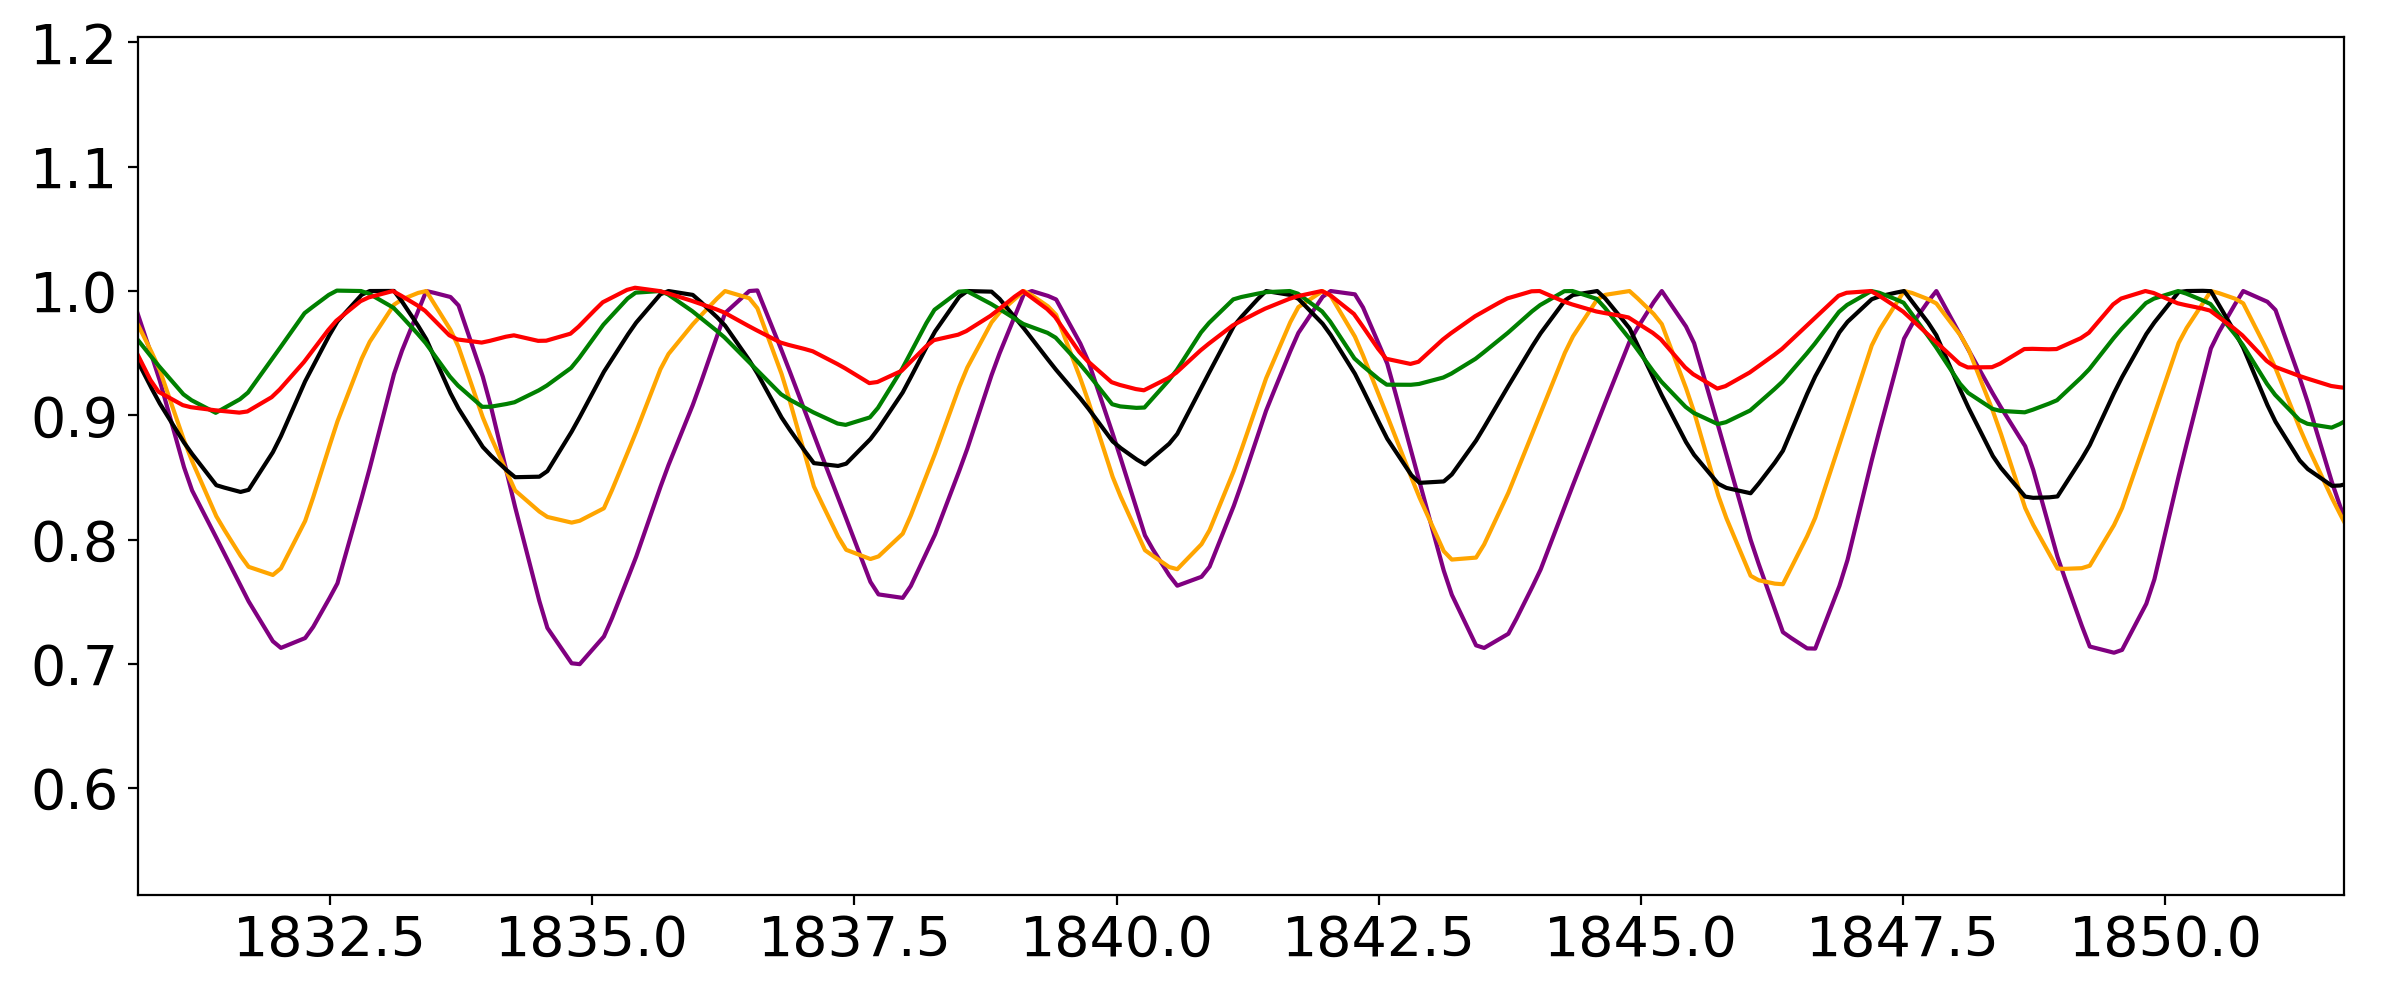

Source center slice ID: 7
Source center slice ID: 7
Source center slice ID: 7
Source center slice ID: 7
Source center slice ID: 7


In [37]:
plt.figure(figsize=(12,5))
colors = ['purple','orange','k','g','r']
counter = -1
for xpos_offset in [-2,-1,0,1,2]:
    counter +=1
    color = colors[counter]
    
    ypos,xpos = funcs.detpixel_trace_compactsource(point_source_oddevencorr,band,d2cMaps,offset_slice=0)

    if len(np.where(lambdaMap[ypos,xpos+xpos_offset]==0)[0]) !=0:
        xpos[lambdaMap[ypos,xpos+xpos_offset]==0]+=1
    if len(np.where(lambdaMap[ypos,xpos+xpos_offset]==0)[0]) !=0:
        xpos[lambdaMap[ypos,xpos+xpos_offset]==0]+=1

    wavl = lambdaMap[ypos,xpos+xpos_offset]
    wvnr = np.flipud(10000./wavl)
    assert len(np.where(lambdaMap[ypos,xpos+xpos_offset]==0)[0]) ==0,'Check wavelength array for zeros!'

    nFringes = 0.1710 * 2. * (wvnr[-1]-wvnr[0])
    nPix = 1024.
    #----------
    signal = point_source_oddevencorr[ypos,xpos+xpos_offset]
    discont_idxs = np.where(np.diff(xpos)!=0)[0]
    for i in range(len(discont_idxs)-2):
        if discont_idxs[i+1]-discont_idxs[i] < 20:
            signal[discont_idxs[i]:discont_idxs[i+1]+1] = 0
    sel_discont_wvl = discont_idxs[np.where(np.diff(discont_idxs) >2.*nPix/nFringes)[0]]
    #-------------
    arr  = np.flipud(signal)

    new_wvnr = np.linspace(wvnr[~np.isinf(wvnr)][0],wvnr[~np.isinf(wvnr)][-1],4*nPix)
    interp = scp_interpolate.interp1d(wvnr,arr)
    new_arr = interp(new_wvnr)

    peaks = funcs.norm_fringe(new_arr,min_dist=4*nPix/nFringes/1.6,k=1,ext=0)

    sel_discont_wvnr = np.flipud(len(wavl)-sel_discont_wvl-2)
    if sel_discont_wvnr[0] !=0:
        sel_discont_wvnr = np.concatenate([np.array([0]),sel_discont_wvnr])
    #----------------
    for i in range(len(sel_discont_wvnr)-1):
        idx1,idx2 = funcs.find_nearest(new_wvnr,wvnr[sel_discont_wvnr[i]]),funcs.find_nearest(new_wvnr,wvnr[sel_discont_wvnr[i+1]])
        norm_fringe = funcs.norm_fringe(new_arr[idx1:idx2],min_dist=4*nPix/nFringes/1.6,k=1,ext=0)
        plt.plot(new_wvnr[idx1:idx2],norm_fringe[0]/norm_fringe[2],color)
plt.ylim(0.6,1.05)
plt.legend()
plt.tight_layout()

### Test 1: Check discrepancies between etalon lines and point source fringes in along-slice direction

In [11]:
# normalize signal
pointsource_slice0_norm,pointsource_slice1_norm,pointsource_slice2_norm = [{} for i in range(3)]
for xpos_offset in xpos_offsets:
#     pointsource_slice6_norm['offset'+str(xpos_offset)] = funcs.norm_fringe(point_source_oddevencorr[ypos_nearbyslice1,xpos_nearbyslice1+xpos_offset],thres=0,min_dist=6,k=1,ext=3)
    pointsource_slice1_norm['offset'+str(xpos_offset)] = funcs.norm_fringe(point_source_oddevencorr[ypos,xpos+xpos_offset],thres=0,min_dist=6,k=1,ext=3)
    pointsource_slice2_norm['offset'+str(xpos_offset)] = funcs.norm_fringe(point_source_oddevencorr[ypos2,xpos2+xpos_offset],thres=0,min_dist=6,k=1,ext=3)

In [14]:
# # let's look at the results (slice 6)
# fig,axs = plt.subplots(2,1,figsize=(18,8))
# axs[0].set_title('Extended etalon data slice 6')
# for xpos_offset in xpos_offsets:
#     for plot in range(2):
#         axs[plot].plot(lambdaMap[ypos_nearbyslice1,xpos_nearbyslice1+xpos_offset],ext_etal_source_oddevencorr[ypos_nearbyslice1,xpos_nearbyslice1+xpos_offset],label='xpos offset {}'.format(xpos_offset))
#         axs[plot].set_xlabel('Wavelength [micron]')
#         axs[plot].set_ylabel('Signal [DN/sec]')
#         axs[plot].legend(loc='upper right',fontsize=10)
# axs[0].set_xlim(4.88,5.77)
# axs[0].set_ylim(0)
# axs[1].set_xlim(5.196,5.274)
# axs[1].set_ylim(0)
# plt.tight_layout()

# fig,axs = plt.subplots(3,1,figsize=(18,13))
# axs[0].set_title('Slice 6')
# axs[0].vlines(lambdaMap[ypos_nearbyslice1,xpos_nearbyslice1][pointsource_slice6_norm['offset0'][1]],0,2.5,alpha=0.4,label='xpos offset 0 fringe peaks')
# for xpos_offset in xpos_offsets:
#     axs[0].plot(lambdaMap[ypos_nearbyslice1,xpos_nearbyslice1+xpos_offset],pointsource_slice6_norm['offset'+str(xpos_offset)][0],label='xpos offset {}'.format(xpos_offset))
#     axs[0].plot(lambdaMap[ypos_nearbyslice1,xpos_nearbyslice1+xpos_offset],pointsource_slice6_norm['offset'+str(xpos_offset)][2])
#     norm_transmission = pointsource_slice6_norm['offset'+str(xpos_offset)][0]/pointsource_slice6_norm['offset'+str(xpos_offset)][2]
#     sel = (norm_transmission>0.7) & (norm_transmission<1.05)
#     axs[1].plot(lambdaMap[ypos_nearbyslice1,xpos_nearbyslice1+xpos_offset][sel],norm_transmission[sel],label='xpos offset {}'.format(xpos_offset))
#     axs[2].plot(lambdaMap[ypos_nearbyslice1,xpos_nearbyslice1+xpos_offset][sel],norm_transmission[sel],label='xpos offset {}'.format(xpos_offset))
# axs[2].vlines(lambdaMap[ypos_nearbyslice1,xpos_nearbyslice1][pointsource_slice6_norm['offset0'][1]],0.7,1.05,alpha=0.4,label='xpos offset 0 fringe peaks')
# axs[0].set_ylim(0,2.5)
# axs[2].set_xlim(5.303,5.405)
# axs[2].set_ylim(0.7,1.05)
# axs[2].set_ylabel('Normalized signal')
# for plot in range(2):
#     axs[plot].set_xlim(4.88,5.77)
#     axs[plot].set_ylabel('Signal [DN/sec]')
# for plot in range(3):
#     axs[plot].set_xlabel('Wavelength [micron]')
#     axs[plot].legend(loc='upper right',fontsize=10)
# plt.tight_layout()

### Remarks:
* Although the etalon lines match, the fringe phase of the point source differs significantly. What we are seeing is the position of the point source fringes seemingly shift from left to right (this could of course be a false impression of continuity, assuming a wave progressing towards the right, i.e. longer wavelengths). As of yet it is not clear why such a situation occurs, however the effect is non-negligible. We know from Notebook 1 - Test 3 that the extended source fringes do not move over a much larger range of along-slice positions, yet the point source fringe do.
* One should be careful; the fact that the etalon lines don't move does not necessarily translate to the point source fringes not moving. The reason this is made explicit here is because the etalon lines probe the intereference in the etalon in-use, not the detector interference (not directly, but likely through the beating profile, which is tricky to analyze meticulously).
* The amplitude of the fringes changes as a function of location on the PSF. This could be bluntly linked to the "decrease in signal", however the matter of the fact is that the fringe amplitude should **not** be dependent on the absolute level of the signal. The fact that it does change implies a decrease of contrast, that somehow the pixels are more effective at resolving the light at the peak of the PSF than on the sides. That said we also see that that is not true given that the contrast of the (xpos offset -2) fringes is the largest out of all the different positions (xpos offsets).
  
Let's look at the other slices.

<IPython.core.display.Javascript object>


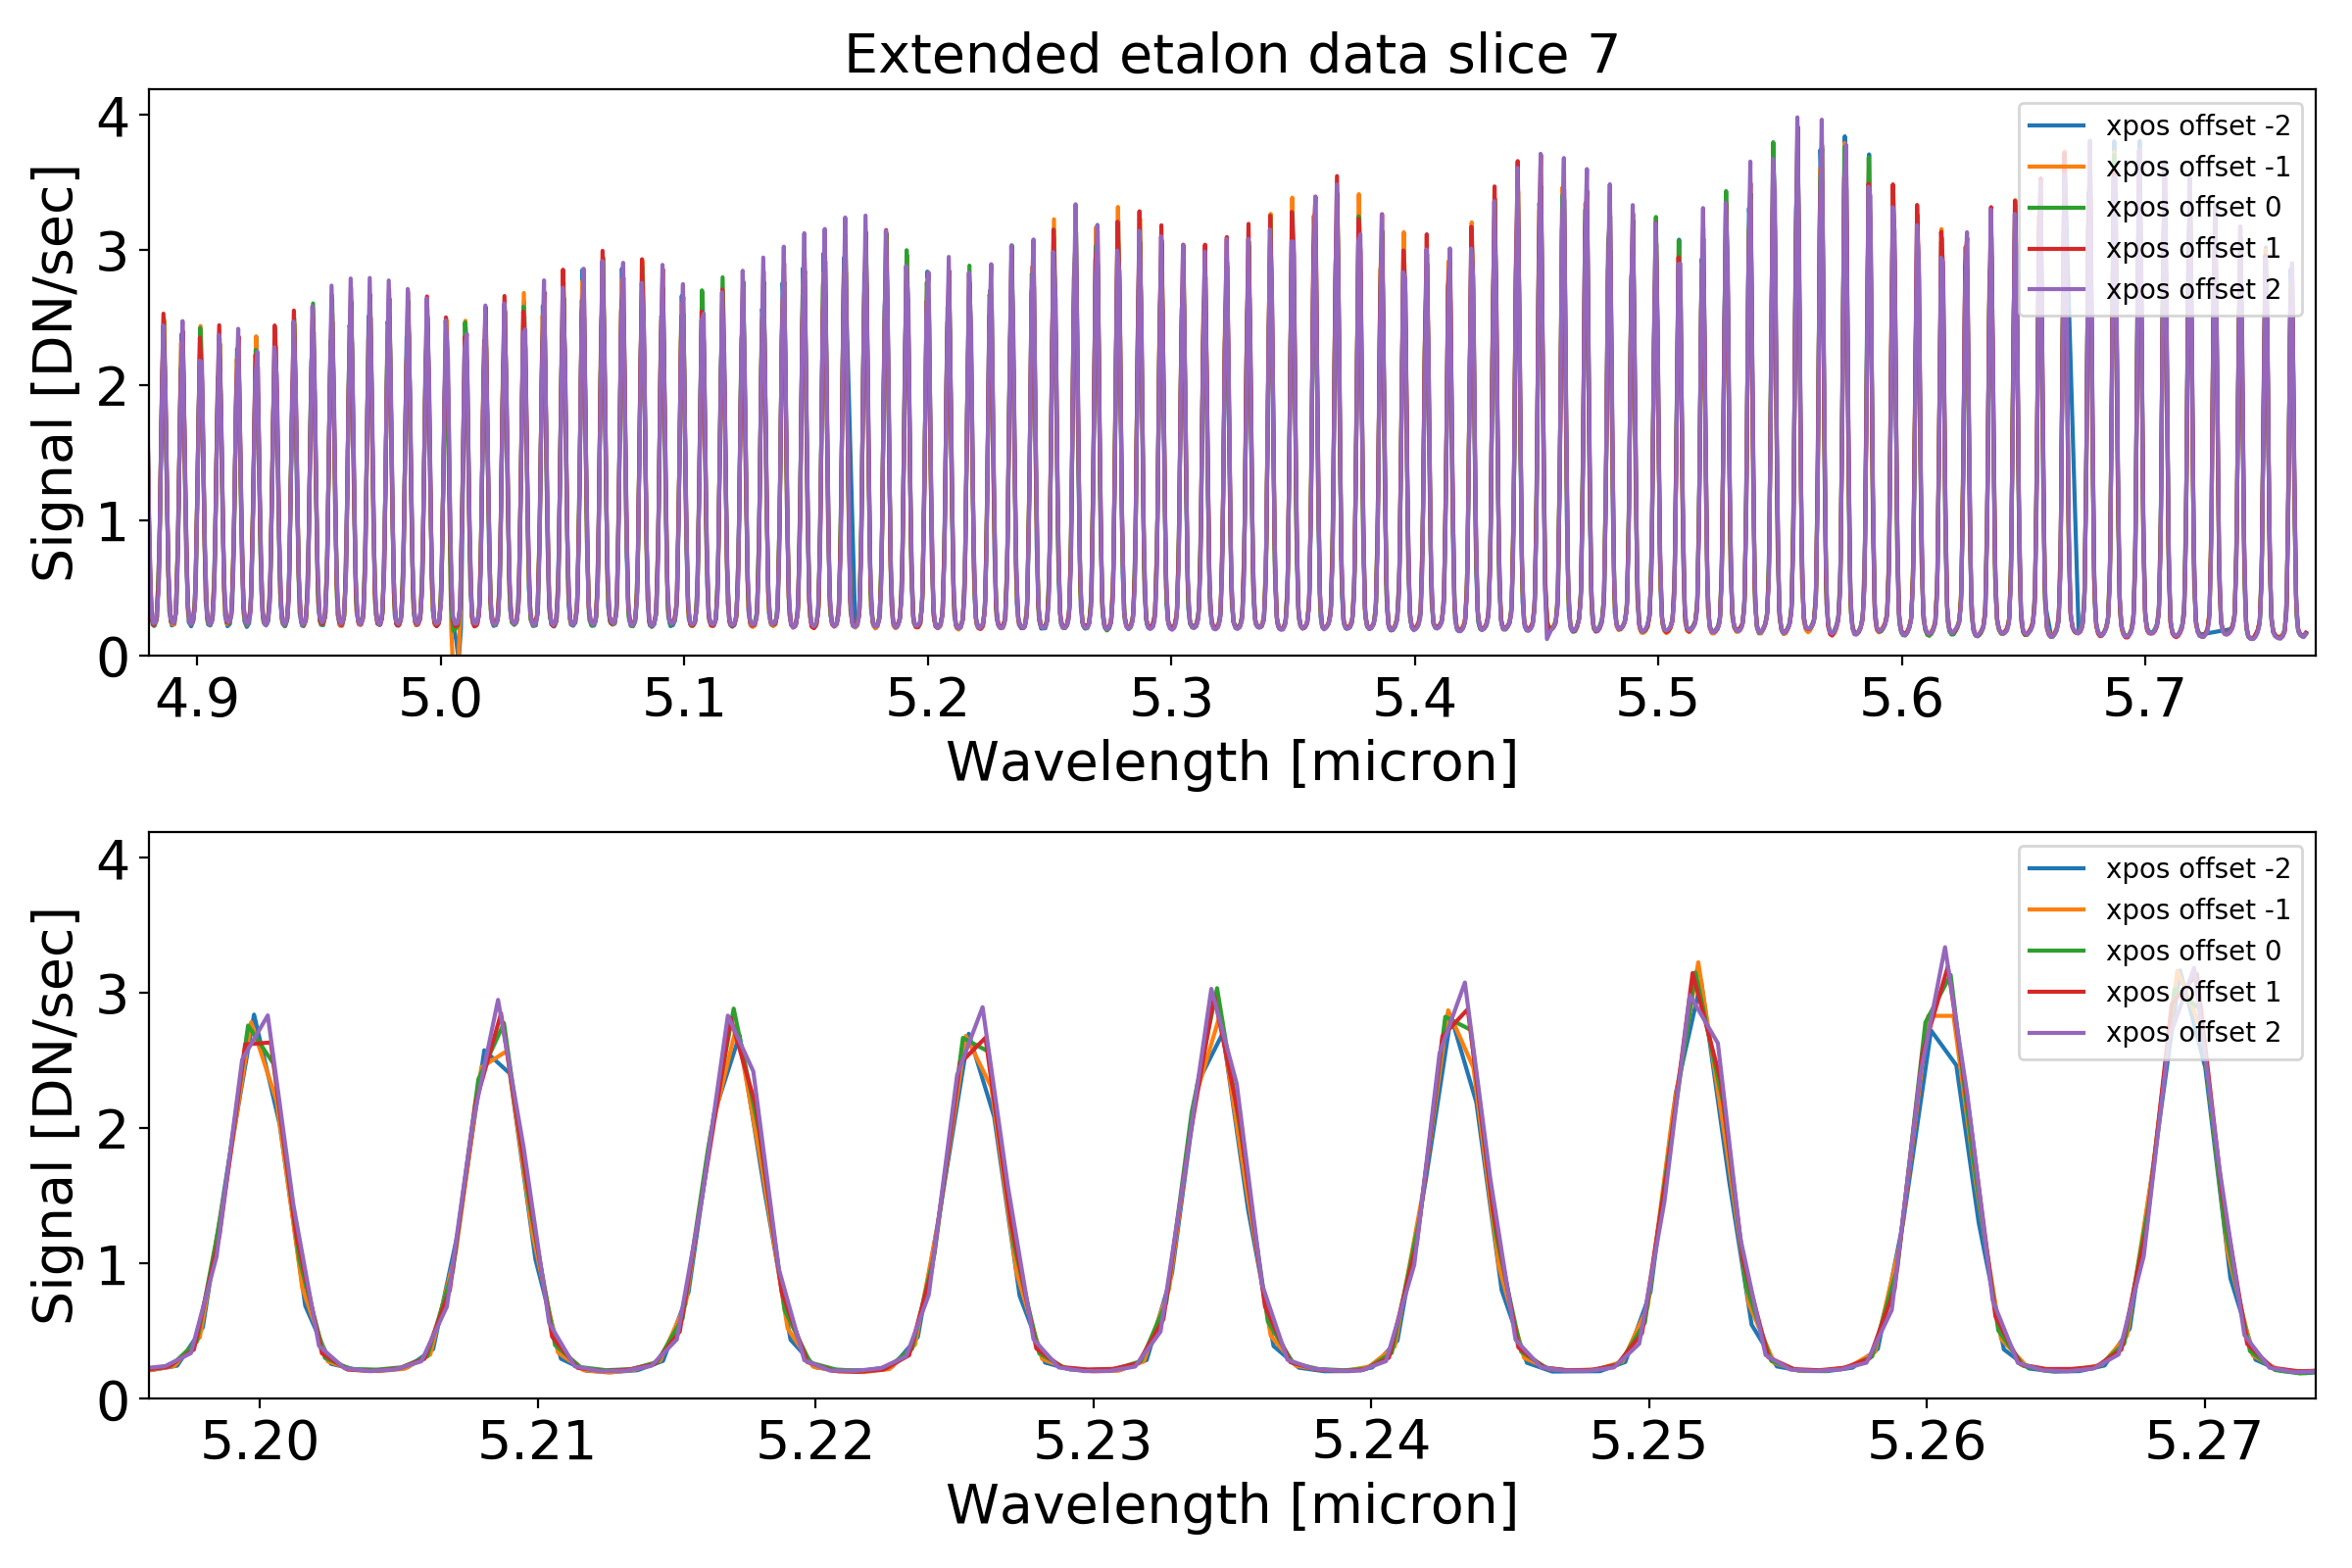

<IPython.core.display.Javascript object>


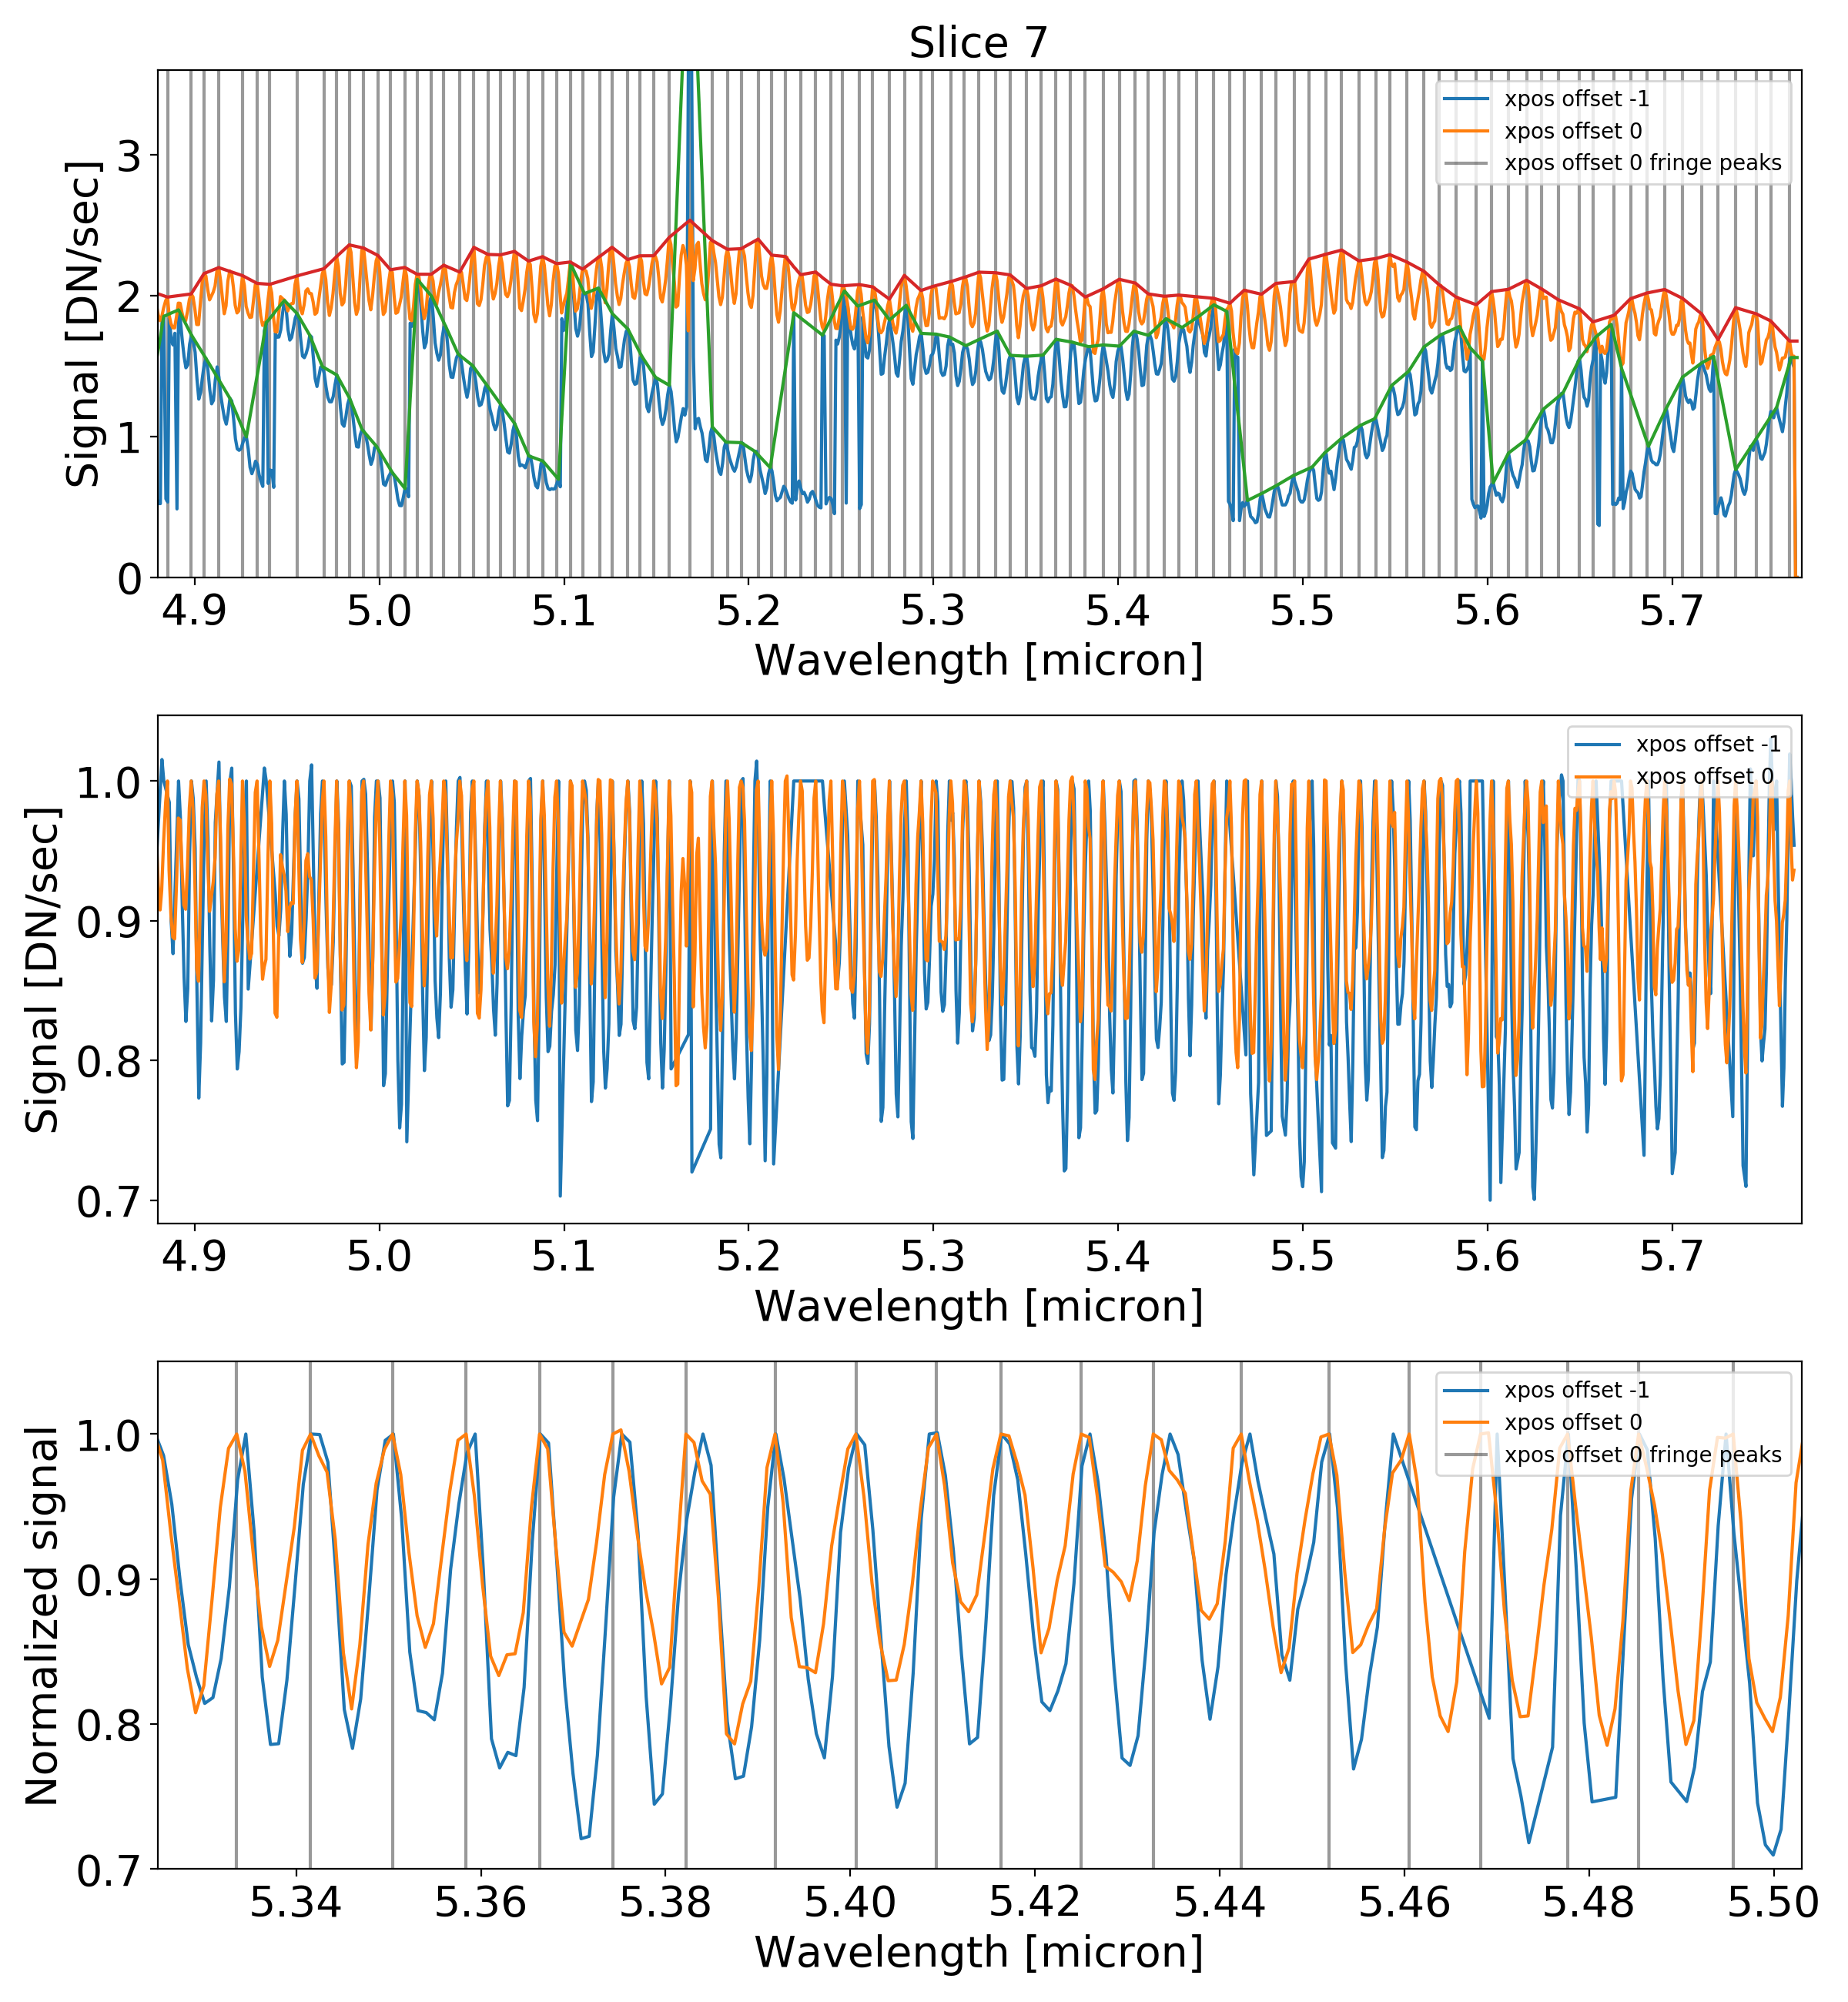

In [14]:
# let's look at the results (slice 7)
fig,axs = plt.subplots(2,1,figsize=(12,8))
axs[0].set_title('Extended etalon data slice 7')
for xpos_offset in xpos_offsets:
    for plot in range(2):
        sel = (lambdaMap[ypos,xpos+xpos_offset]!=0)
        axs[plot].plot(lambdaMap[ypos,xpos+xpos_offset][sel],ext_etal_source_oddevencorr[ypos,xpos+xpos_offset][sel],label='xpos offset {}'.format(xpos_offset))
        axs[plot].set_xlabel('Wavelength [micron]')
        axs[plot].set_ylabel('Signal [DN/sec]')
        axs[plot].legend(loc='upper right',fontsize=10)
axs[0].set_xlim(4.88,5.77)
axs[0].set_ylim(0)
axs[1].set_xlim(5.196,5.274)
axs[1].set_ylim(0)
plt.tight_layout()

fig,axs = plt.subplots(3,1,figsize=(12,13))
axs[0].set_title('Slice 7')
axs[0].vlines(lambdaMap[ypos,xpos][pointsource_slice1_norm['offset0'][1]],0,3.6,alpha=0.4,label='xpos offset 0 fringe peaks')
for xpos_offset in [-1,0]:
    sel = (lambdaMap[ypos,xpos+xpos_offset]!=0)
    axs[0].plot(lambdaMap[ypos,xpos+xpos_offset][sel],pointsource_slice1_norm['offset'+str(xpos_offset)][0][sel],label='xpos offset {}'.format(xpos_offset))
for xpos_offset in [-1,0]:
    sel = (lambdaMap[ypos,xpos+xpos_offset]!=0)
    axs[0].plot(lambdaMap[ypos,xpos+xpos_offset][sel],pointsource_slice1_norm['offset'+str(xpos_offset)][2][sel])
    norm_transmission = pointsource_slice1_norm['offset'+str(xpos_offset)][0][sel]/pointsource_slice1_norm['offset'+str(xpos_offset)][2][sel]
    sel2 = (norm_transmission>0.7) & (norm_transmission<1.05)
    axs[1].plot(lambdaMap[ypos,xpos+xpos_offset][sel][sel2],norm_transmission[sel2],label='xpos offset {}'.format(xpos_offset))
    axs[2].plot(lambdaMap[ypos,xpos+xpos_offset][sel][sel2],norm_transmission[sel2],label='xpos offset {}'.format(xpos_offset))
axs[2].vlines(lambdaMap[ypos,xpos][pointsource_slice1_norm['offset0'][1]],0.7,1.05,alpha=0.4,label='xpos offset 0 fringe peaks')
axs[0].set_ylim(0,3.6)
axs[2].set_xlim(5.325,5.503)
axs[2].set_ylim(0.7,1.05)
axs[2].set_ylabel('Normalized signal')
for plot in range(2):
    axs[plot].set_xlim(4.88,5.77)
    axs[plot].set_ylabel('Signal [DN/sec]')
for plot in range(3):
    axs[plot].set_xlabel('Wavelength [micron]')
    axs[plot].legend(loc='upper right',fontsize=10)
plt.tight_layout()

<IPython.core.display.Javascript object>


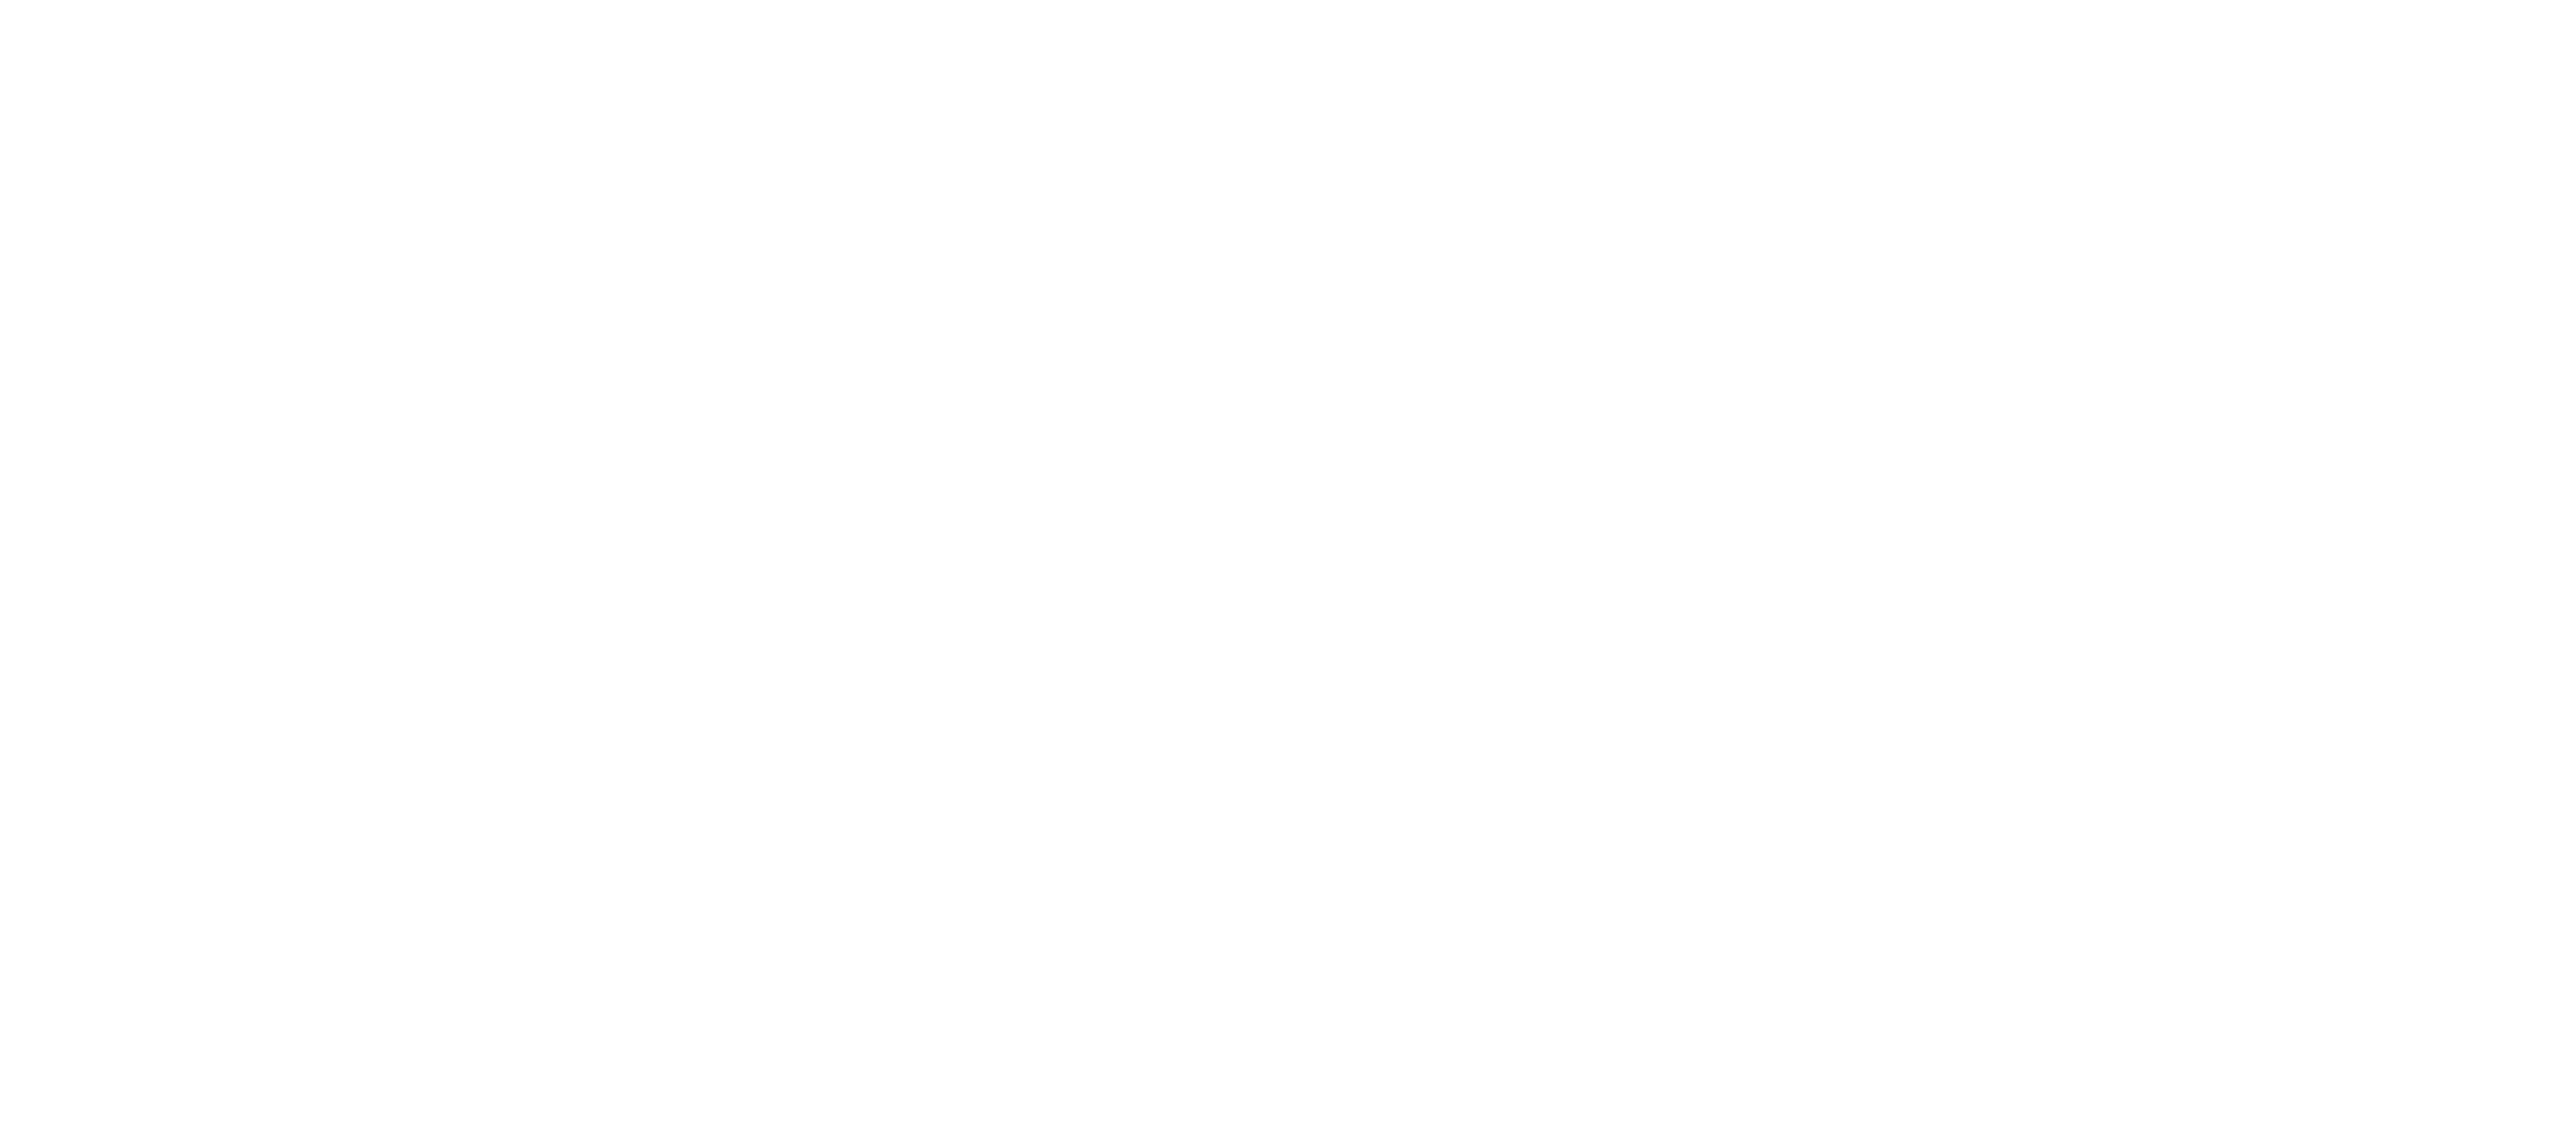

NameError: name 'ypos_nearbyslice2' is not defined

In [13]:
fig,axs = plt.subplots(2,1,figsize=(18,8))
axs[0].set_title('Extended etalon data slice 8')
for xpos_offset in xpos_offsets:
    for plot in range(2):
        axs[plot].plot(lambdaMap[ypos_nearbyslice2,xpos_nearbyslice2+xpos_offset],ext_etal_source_oddevencorr[ypos_nearbyslice2,xpos_nearbyslice2+xpos_offset],label='xpos offset {}'.format(xpos_offset))
        axs[plot].set_xlabel('Wavelength [micron]')
        axs[plot].set_ylabel('Signal [DN/sec]')
        axs[plot].legend(loc='upper right',fontsize=10)
axs[0].set_xlim(4.88,5.77)
axs[0].set_ylim(0)
axs[1].set_xlim(5.196,5.274)
axs[1].set_ylim(0)
plt.tight_layout()

fig,axs = plt.subplots(3,1,figsize=(18,13))
axs[0].set_title('Slice 8')
axs[0].vlines(lambdaMap[ypos_nearbyslice2,xpos_nearbyslice2][pointsource_slice8_norm['offset0'][1]],0,2.6,alpha=0.4,label='xpos offset 0 fringe peaks')
for xpos_offset in xpos_offsets:
    axs[0].plot(lambdaMap[ypos_nearbyslice2,xpos_nearbyslice2+xpos_offset],pointsource_slice8_norm['offset'+str(xpos_offset)][0],label='xpos offset {}'.format(xpos_offset))
    axs[0].plot(lambdaMap[ypos_nearbyslice2,xpos_nearbyslice2+xpos_offset],pointsource_slice8_norm['offset'+str(xpos_offset)][2])
    norm_transmission = pointsource_slice8_norm['offset'+str(xpos_offset)][0]/pointsource_slice8_norm['offset'+str(xpos_offset)][2]
    sel = (norm_transmission>0.7) & (norm_transmission<1.05)
    axs[1].plot(lambdaMap[ypos_nearbyslice2,xpos_nearbyslice2+xpos_offset][sel],norm_transmission[sel],label='xpos offset {}'.format(xpos_offset))
    axs[2].plot(lambdaMap[ypos_nearbyslice2,xpos_nearbyslice2+xpos_offset][sel],norm_transmission[sel],label='xpos offset {}'.format(xpos_offset))
axs[2].vlines(lambdaMap[ypos_nearbyslice2,xpos_nearbyslice2][pointsource_slice8_norm['offset0'][1]],0.7,1.05,alpha=0.4,label='xpos offset 0 fringe peaks')
axs[0].set_ylim(0,2.6)
axs[2].set_xlim(5.135,5.27)
axs[2].set_ylim(0.7,1.05)
axs[2].set_ylabel('Normalized signal')
for plot in range(2):
    axs[plot].set_xlim(4.88,5.77)
    axs[plot].set_ylabel('Signal [DN/sec]')
for plot in range(3):
    axs[plot].set_xlabel('Wavelength [micron]')
    axs[plot].legend(loc='upper right',fontsize=10)
plt.tight_layout()

### Remarks:
* The same conclusions are drawn for slice 7 and slice 8, as per the remarks for slice 6. Similar to the discussion in Notebook 2, the change in fringe amplitude cannot be related to a real change in the reflectivity of the resonator, but a loss of capacity of the detectors to resolve the fringes produced by the detector. This "loss of capacity" seems to be related to the location on the PSF itself, and not based on the along-slice position, given the tests performed so far.
* The phase shift that we see here is much more important than the phase shift illustrated in Notebook 4 - Test 3, where we looked at the fringe behavior at the peak of the PSF for point sources located on the left and middle of the FOV. As such we cannot relate this to an "along-slice correction". Furthermore we have shown in Notebook 3 - Test 2 that the point source etalon lines (not the extended etalon lines) show no phase shift in different along-slice positions. This was shown in slice 9, 10, and 11, thus it is safe to assume that the fact holds in all slices. This brings us to think that the two datasets cannot be used complimentarily to solve the problem (but to assure that the wavelength calibration is satisfied in all positions). What is the fundamental difference between the point source etalon data fringes and the point source fringes though? The former is born from the etalon ("ET1A") while the latter is born from the MIRI detector. How do the detectors behave under different illumination patterns?

## Conclusions:  
* There is a variation of fringe phase with location on the PSF.
* The variation in across-slice direction (different slices) of the phase can conceivably be accounted for by a slight change in the detector optical properties.
* The variation in along-slice direction on the PSF does not match that of the point source etalon data seen in Notebook 3 - Test 2. It is clear that the detector behaves differently to an etalon.

## Follow-up question:  
Where do the extended source fringes "stand" with respect to the point source fringes? We know that the former do not shift in along-slice direction, but do the position of the fringe peaks match that of the point source fringes?